<b>Data mining project - 2020/21</b><br>
<b>Authors</b>: [Alexandra Bradan](https://github.com/alexandrabradan), [Alice Graziani](https://github.com/alicegraziani25) and [Eleonora Cocciu](https://github.com/eleonoracocciu)<br>
<b>Python version</b>: 3.x<br>
<b>Last update: 21/05/2021<b>

In [397]:
import os
import sys

import operator
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

from collections import Counter
from collections import OrderedDict

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from  matplotlib.ticker import FuncFormatter

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler


plt.rcParams["patch.force_edgecolor"] = True
%matplotlib inline

In [398]:
tracks = pd.read_csv('../../data/fma_metadata/tracks.csv', index_col=0, header=[0, 1])
tracks.shape

(106574, 52)

In [399]:
tracks.head(3).T

track_id                                                                  2  \
album  comments                                                           0   
       date_created                                     2008-11-26 01:44:45   
       date_released                                    2009-01-05 00:00:00   
       engineer                                                         NaN   
       favorites                                                          4   
       id                                                                 1   
       information                                                  <p></p>   
       listens                                                         6073   
       producer                                                         NaN   
       tags                                                              []   
       title                                           AWOL - A Way Of Life   
       tracks                                                             7   
       type                                                           Album   
artist active_year_begin                                2006-01-01 00:00:00   
       active_year_end                                                  NaN   
       associated_labels                                                NaN   
       bio                <p>A Way Of Life, A Collective of Hip-Hop from...   
       comments                                                           0   
       date_created                                     2008-11-26 01:42:32   
       favorites                                                          9   
       id                                                                 1   
       latitude                                                     40.0583   
       location                                                  New Jersey   
       longitude                                                   -74.4057   
       members            Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...   
       name                                                            AWOL   
       related_projects   The list of past projects is 2 long but every1...   
       tags                                                        ['awol']   
       website                      http://www.AzillionRecords.blogspot.com   
       wikipedia_page                                                   NaN   
set    split                                                       training   
       subset                                                         small   
track  bit_rate                                                      256000   
       comments                                                           0   
       composer                                                         NaN   
       date_created                                     2008-11-26 01:48:12   
       date_recorded                                    2008-11-26 00:00:00   
       duration                                                         168   
       favorites                                                          2   
       genre_top                                                    Hip-Hop   
       genres                                                          [21]   
       genres_all                                                      [21]   
       information                                                      NaN   
       interest                                                        4656   
       language_code                                                     en   
       license            Attribution-NonCommercial-ShareAlike 3.0 Inter...   
       listens                                                         1293   
       lyricist                                                         NaN   
       number                                                             3   
       publisher                                  

<h6>DataFrame's headers </h6>

In [400]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106574 entries, 2 to 155320
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   (album, comments)            106574 non-null  int64  
 1   (album, date_created)        103045 non-null  object 
 2   (album, date_released)       70294 non-null   object 
 3   (album, engineer)            15295 non-null   object 
 4   (album, favorites)           106574 non-null  int64  
 5   (album, id)                  106574 non-null  int64  
 6   (album, information)         83149 non-null   object 
 7   (album, listens)             106574 non-null  int64  
 8   (album, producer)            18060 non-null   object 
 9   (album, tags)                106574 non-null  object 
 10  (album, title)               105549 non-null  object 
 11  (album, tracks)              106574 non-null  int64  
 12  (album, type)                100066 non-null  object 
 13 

<h6>DataFrame's numerical statistics</h6>

In [401]:
tracks.describe().T

count           mean            std         min  \
album  comments   106574.0       0.394946       2.268915   -1.000000   
       favorites  106574.0       1.286927       3.133035   -1.000000   
       id         106574.0   12826.933914    6290.261805   -1.000000   
       listens    106574.0   32120.306182  147853.178406   -1.000000   
       tracks     106574.0      19.721452      39.943673   -1.000000   
artist comments   106574.0       1.894702       6.297679   -1.000000   
       favorites  106574.0      30.041915     100.511408   -1.000000   
       id         106574.0   12036.770404    6881.420867    1.000000   
       latitude    44544.0      39.901626      18.240860  -45.878760   
       longitude   44544.0     -38.668642      65.237220 -157.526855   
track  bit_rate   106574.0  263274.695048   67623.443584   -1.000000   
       comments   106574.0       0.031621       0.321993    0.000000   
       duration   106574.0     277.849100     305.518553    0.000000   
       favorites  106574.0       3.182521      13.513820    0.000000   
       interest   106574.0    3541.310207   19017.430891    2.000000   
       listens    106574.0    2329.353548    8028.070647    0.000000   
       number     106574.0       8.260945      15.243271    0.000000   

                            25%            50%           75%           max  
album  comments        0.000000       0.000000       0.00000  5.300000e+01  
       favorites       0.000000       0.000000       1.00000  6.100000e+01  
       id           7793.000000   13374.000000   18203.00000  2.294000e+04  
       listens      3361.000000    8982.000000   23635.00000  3.564243e+06  
       tracks          7.000000      11.000000      17.00000  6.520000e+02  
artist comments        0.000000       0.000000       1.00000  7.900000e+01  
       favorites       1.000000       5.000000      16.00000  9.630000e+02  
       id           6443.000000   12029.500000   18011.00000  2.435700e+04  
       latitude       39.271398      41.387917      48.85693  6.728601e+01  
       longitude     -79.997459     -73.554431       4.35171  1.752770e+02  
track  bit_rate   192000.000000  299914.000000  320000.00000  4.480000e+05  
       comments        0.000000       0.000000       0.00000  3.700000e+01  
       duration      149.000000     216.000000     305.00000  1.835000e+04  
       favorites       0.000000       1.000000       3.00000  1.482000e+03  
       interest      599.000000    1314.000000    3059.00000  3.293557e+06  
       listens       292.000000     764.000000    2018.00000  5.432520e+05  
       number          2.000000       5.000000       9.00000  2.550000e+02

In [402]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_tracks = tracks.select_dtypes(include=numerics)
numeric_tracks.shape

(106574, 17)

In [403]:
for column_name in numeric_tracks.columns:
    minus_one_values = sum(numeric_tracks[column_name] == -1)
    if minus_one_values > 0:
        print(minus_one_values, column_name)

3529 ('album', 'comments')
3529 ('album', 'favorites')
1025 ('album', 'id')
3529 ('album', 'listens')
3529 ('album', 'tracks')
856 ('artist', 'comments')
856 ('artist', 'favorites')
105 ('track', 'bit_rate')


Regarding the numerical features, the dataset has:
- **62030 NaN records for ('artist', 'latitude')**;
- **62030 NaN records for ('artist', 'longitude')**.

In the Data Cleaning stage we will descarded the highly missing record columns.

We can notice some more **subtle missing values**, expressed as **-1**:
- 3529 ('album', 'comments');
- 3529 ('album', 'favorites');
- 1025 ('album', 'id');
- 3529 ('album', 'listens');
- 3529 ('album', 'tracks');
- 856 ('artist', 'comments');
- 856 ('artist', 'favorites');
- 105 ('track', 'bit_rate').

In [404]:
def check_consistence_of_minus_one_attribute(minus_one_colum_name):
    if minus_one_colum_name[0] == "track":
        id_flag = 'title'
        ids_list = list(tracks[(tracks[minus_one_colum_name] == -1)][(minus_one_colum_name[0], 'title')])
        art_list = list(tracks[(tracks[minus_one_colum_name] == -1)][('artist', 'id')])
        alb_list = list(tracks[(tracks[minus_one_colum_name] == -1)][('album', 'id')])
        print(minus_one_colum_name)
        for adi, art, alb in zip(ids_list, art_list, alb_list):
            tmp_list = list(tracks[(tracks[(minus_one_colum_name[0], 'title')] == adi) & \
                                   (tracks[('artist', 'id')] == art) & \
                                   (tracks[('album', 'id')] == alb)
                                  ][minus_one_colum_name].unique())
            if len(tmp_list) > 1:
                print(adi, tmp_list)
    else:
        ids_list = list(tracks[(tracks[minus_one_colum_name] == -1)][(minus_one_colum_name[0], 'id')].unique())
        print(minus_one_colum_name)
        for adi in ids_list:
            tmp_list = list(tracks[(tracks[(minus_one_colum_name[0], 'id')] == adi)][minus_one_colum_name].unique())
            if len(tmp_list) > 1:
                print(adi, tmp_list)

In [405]:
minus_ones_columns = [('album', 'comments'), ('album', 'favorites'), ('album', 'id'), ('album', 'listens'),
                      ('album', 'tracks'), ('artist', 'comments'), ('artist', 'favorites'), 
                      ('track', 'bit_rate')]
for column_name in minus_ones_columns:
    check_consistence_of_minus_one_attribute(column_name)

('album', 'comments')
('album', 'favorites')
('album', 'id')
('album', 'listens')
('album', 'tracks')
('artist', 'comments')
('artist', 'favorites')
('track', 'bit_rate')


Investigating, we found out that each album, artist and track having a -1 as numeric missing value is unique in its kind (it doesn't figure in the dataset with the same id/title and a value different than -1). So we proceed as following:

TODO:
1. we set ('album', 'comments'), ('album', 'favorites'), ('album', 'listens'), ('artist', 'comments'), ('artist', 'favorites') to 0;
2. we update ('album', 'tracks') to 1, since the album associated with the current track, contains it;
3. we craft new ids for ('album', 'id'), incrementally increasing the maximum id (22,940) present in the dataset;
4. we approximate ('track', 'bit_rate') by other tracks' matching genre_top mean bit_rate;

In [406]:
tracks[(tracks[('album', 'comments')] == -1) &
       (tracks[('album', 'favorites')] == -1) &
       (tracks[('album', 'id')] == -1) &
       (tracks[('album', 'listens')] == -1) &
       (tracks[('album', 'tracks')] == -1)].shape[0]

1025

In [407]:
artist_ids = tracks[(tracks[('album', 'comments')] == -1) &
       (tracks[('album', 'favorites')] == -1) &
       (tracks[('album', 'id')] == -1) &
       (tracks[('album', 'listens')] == -1) &
       (tracks[('album', 'tracks')] == -1)][('artist', 'id')].values

We also find out that the 1025 albums without ids have also comments, favorites, listens and tracks set to -1, so we can hypotize they are part of track whose the album information are missing (they don't belong to any known album).

<h6>Imputing missing albums' id, using incrementally value greater than the greatest id prenset in the
# ('album', 'id') column</h6>

In [408]:
max_album_id = tracks[('album', 'id')].max()
missing_album_ids_indeces = tracks[tracks[('album', 'id')] == -1].index
i = max_album_id + 1
for idx in missing_album_ids_indeces:
    tracks.at[idx, ('album', 'id')] = i
    i += 1
tracks[tracks[('album', 'id')] == -1].shape

(0, 52)

<h6> Checking if exists tracks having the same title, the same artist, the same album and combination of them </h6>

In [458]:
check0 = tracks[tracks[[('track', 'title')]].duplicated(keep=False)]
print("tracks with same title", check0.shape[0])
check1 = tracks[tracks[[('album', 'id'),('artist', 'id'), ('track', 'title')]].duplicated(keep=False)]
print("tracks with same title, artist id and album id", check1.shape[0])
check2 = tracks[tracks[[('album', 'id'), ('track', 'title')]].duplicated(keep=False)]
print("tracks with same title and album id", check2.shape[0])
check3 = tracks[tracks[[('artist', 'id'), ('track', 'title')]].duplicated(keep=False)]
print("tracks with same title and artist id", check3.shape[0])

tracks with same title 17860
tracks with same title, artist id and album id 1036
tracks with same title and album id 1449
tracks with same title and artist id 6270


Since tracks having same title and album id are more numerous than tracks sharing same title, artist id and album id and tracks sharing same title and artist id, we can conclude that they probably belong to musical featuring among 413 different artists. For the tracks sharing the same title and artist id, we can conclude that they belong to artist's revival/mashup of that particulat song and so the same track belongs to multiple artist's albums.
For the tracks sharing the same title, album id and artist id we found that they actually are the same track, repeated multiple times in the same album (this is a quite strange behaviour that needs further investigation).

In [446]:
for row in check1[[('album', 'id'), ('artist', 'id'), ('track', 'title')]].itertuples():
    print(row[0], row[1], row[2], row[3], sep="\t")

208	84	127	Safe Harbor
209	84	127	Safe Harbor
1067	290	10	Mi Corazon Zone
1068	290	10	Mi Corazon Zone
1236	326	219	Untitled
1237	326	219	Untitled
1244	333	163	w/ Chuck Bettis (2002)
1250	333	163	Harper (1999)
1256	333	163	w/ Chuck Bettis (2002)
1257	333	163	Harper (1999)
1591	415	265	SSG Live
1594	415	265	SSG Live
1598	415	265	SSG Live
1600	415	265	SSG Live
1602	415	265	SSG Live
1606	415	265	SSG Live
1609	415	265	SSG Live
1613	415	265	SSG Live
2109	540	10	Untitled
2110	540	10	Untitled
2111	540	10	Untitled
2112	540	10	Untitled
2113	540	10	Untitled
2114	540	10	Untitled
2115	540	10	Untitled
2116	540	10	Untitled
3489	737	575	Title Unknown
3491	737	575	Title Unknown
3493	737	575	Title Unknown
3494	875	575	TBA
3495	737	575	Title Unknown
3496	875	575	TBA
3497	737	575	Title Unknown
3499	737	575	Title Unknown
4857	1681	1657	high pitch polytone
4859	1681	1657	english man
4861	1681	1657	russian man
4863	1681	1657	m3
4868	1681	1657	counting control
4872	1681	1657	high pitch polytone
4880	1681	1657

In [453]:
tracks[tracks[('track','title')] == "La Météo"].T

track_id                                                             151842  \
album  comments                                                           0   
       date_created                                     2017-02-11 04:24:53   
       date_released                                    2006-02-01 00:00:00   
       engineer                                                         NaN   
       favorites                                                          1   
       id                                                             22594   
       information                                                      NaN   
       listens                                                         3444   
       producer                                                         NaN   
       tags                                                              []   
       title                                                     Lysistrata   
       tracks                                                            30   
       type                                                           Album   
artist active_year_begin                                1999-01-01 00:00:00   
       active_year_end                                  2007-01-01 00:00:00   
       associated_labels                                                NaN   
       bio                <p>LES <span class="spip_surligne">BAIGNEURS</...   
       comments                                                           0   
       date_created                                     2017-02-11 04:31:45   
       favorites                                                          2   
       id                                                             23909   
       latitude                                                         NaN   
       location                                                         NaN   
       longitude                                                        NaN   
       members                    Ian - guitar\nDavid - guitar\njb - guitar   
       name                                                   Les Baigneurs   
       related_projects                                                 NaN   
       tags                                               ['les baigneurs']   
       website                            http://www.lespotagersnatures.org   
       wikipedia_page                                                   NaN   
set    split                                                       training   
       subset                                                         large   
track  bit_rate                                                      320000   
       comments                                                           0   
       composer                                                         NaN   
       date_created                                     2017-02-11 08:48:29   
       date_recorded                                                    NaT   
       duration                                                          31   
       favorites                                                          1   
       genre_top                                                       Folk   
       genres                                                          [49]   
       genres_all                                                  [49, 17]   
       information                                                      NaN   
       interest                                                         404   
       language_code                                                    NaN   
       license            Creative Commons Attribution-NonCommercial-NoD...   
       listens                                                          342   
       lyricist                                                         NaN   
       number                                                             1   
       publisher                                  

In [456]:
tracks[tracks[('track','title')] == "Mi Corazon Zone"].T

track_id                                                               1067  \
album  comments                                                           1   
       date_created                                     2008-11-26 02:33:56   
       date_released                                    2005-04-15 00:00:00   
       engineer                                                         NaN   
       favorites                                                          1   
       id                                                               290   
       information        <p>I'm not quite sure what it really is, but i...   
       listens                                                        48302   
       producer                                                         NaN   
       tags                                                              []   
       title                                                       Norteñas   
       tracks                                                            10   
       type                                                           Album   
artist active_year_begin                                                NaT   
       active_year_end                                                  NaT   
       associated_labels                       Mistletone, Marriage Records   
       bio                <p>"Lucky Dragons" means any recorded or perfo...   
       comments                                                           3   
       date_created                                     2008-11-26 01:43:35   
       favorites                                                        111   
       id                                                                10   
       latitude                                                     34.0522   
       location                                             Los Angeles, CA   
       longitude                                                   -118.244   
       members                                   Luke Fischbeck\nSarah Rara   
       name                                                   Lucky Dragons   
       related_projects                                                 NaN   
       tags                                               ['lucky dragons']   
       website                                 http://hawksandsparrows.org/   
       wikipedia_page                                                   NaN   
set    split                                                           test   
       subset                                                         large   
track  bit_rate                                                      192000   
       comments                                                           0   
       composer                                                         NaN   
       date_created                                     2008-11-26 02:33:04   
       date_recorded                                    2005-04-15 00:00:00   
       duration                                                          16   
       favorites                                                          2   
       genre_top                                               Experimental   
       genres                                                          [22]   
       genres_all                                                  [38, 22]   
       information                                                      NaN   
       interest                                                       18379   
       language_code                                                     en   
       license            Attribution-Noncommercial-Share Alike 3.0 Unit...   
       listens                                                        17088   
       lyricist                                                         NaN   
       number                                                             2   
       publisher                                  

It seems the tracks sharing the same album id, artist id and track title differ only for track's metadata:
- date_created;
- duration;
- favorites;
- interest;
- listens;
- number.

In particulr having a different track number means that they belong to the same album, but in it they occupy a different track position. For this reason we can consider them as not being duplicates. Actually we can hypotize they are extensions of tracks itself (like addign a longuer intro, chorus or ending) (TODO: as for certainty)

<h6>Categorical features insight</h6>

In [231]:
tracks.describe(include='object').T

count unique  \
album  date_created       103045  14340   
       date_released       70294   3669   
       engineer            15295    622   
       information         83149  11075   
       producer            18060    760   
       tags               106574   2388   
       title              105549  14298   
       type               100066      5   
artist active_year_begin   22711     76   
       active_year_end      5375     57   
       associated_labels   14271    754   
       bio                 71156   6084   
       date_created       105718  15970   
       location            70210   2329   
       members             46849   4015   
       name               106574  16294   
       related_projects    13152    752   
       tags               106574  15660   
       website             79256   6642   
       wikipedia_page       5581    389   
set    split              106574      3   
       subset             106574      3   
track  composer             3670    505   
       date_created       106574  86169   
       date_recorded        6159    773   
       genre_top           49598     16   
       genres             106574   4768   
       genres_all         106574   4151   
       information          2349   1586   
       language_code       15024     44   
       license            106487    113   
       lyricist              311     66   
       publisher            1263    135   
       tags               106574   2451   
       title              106573  94986   

                                                                        top  \
album  date_created                                     2015-01-26 13:04:57   
       date_released                                    2008-01-01 00:00:00   
       engineer                                              Ernie Indradat   
       information        <p class="p1" style="margin: 0px; padding: 8px...   
       producer                                                  Joe Belock   
       tags                                                              []   
       title                                              microSong Entries   
       type                                                           Album   
artist active_year_begin                                2007-01-01 00:00:00   
       active_year_end                                  2016-01-01 00:00:00   
       associated_labels                                       HUSH Records   
       bio                <p><span style="color: #333333; font-family: G...   
       date_created                                     2013-03-31 02:17:41   
       location                                                Brooklyn, NY   
       members                                            Konstantin Trokay   
       name                                                         Kosta T   
       related_projects   Ratatat, Lullatone, Nightmares On Wax, Air, Mo...   
       tags                                                              []   
       website                     https://soundcloud.com/konstantin-trokay   
       wikipedia_page            http://en.wikipedia.org/wiki/Josh_Woodward   
set    split                                                       training   
       subset                                                         large   
track  composer                                           konstantin trokai   
       date_created                                     2009-04-20 22:30:54   
       date_recorded                                    2008-11-26 00:00:00   
       genre_top                                                       Rock   
       genres                                                          [21]   
       genres_all                                                      [21]   
       information        <p><a href="http://www.myspace.com/theshambler...   
       language_code                                                     en   
       license            Att

In [232]:
categorical_tracks = tracks.select_dtypes('object')
categorical_tracks.shape

(106574, 35)

In [233]:
for column_name in categorical_tracks.columns:
    # count number of rows with missing values
    data = categorical_tracks[column_name]
    n_miss = data.isnull().sum()
    perc = n_miss / categorical_tracks.shape[0] * 100
    if n_miss > 0:
        # print( '%.1f%% of NaN rows for %s ' % (perc, column_name))
        pass

Regarding the categorical features, the dataset has:

- 3.3% of NaN rows for ('album', 'date_created') 
- 34.0% of NaN rows for ('album', 'date_released') 
- **85.6% of NaN rows for ('album', 'engineer')**
- 22.0% of NaN rows for ('album', 'information') 
- **83.1% of NaN rows for ('album', 'producer')**
- 1.0% of NaN rows for ('album', 'title') 
- 6.1% of NaN rows for ('album', 'type') 
- **78.7% of NaN rows for ('artist', 'active_year_begin')** 
- **95.0% of NaN rows for ('artist', 'active_year_end')** 
- **86.6% of NaN rows for ('artist', 'associated_labels')** 
- 33.2% of NaN rows for ('artist', 'bio') 
- 0.8% of NaN rows for ('artist', 'date_created') 
- 34.1% of NaN rows for ('artist', 'location') 
- 56.0% of NaN rows for ('artist', 'members') 
- **87.7% of NaN rows for ('artist', 'related_projects')** 
- 25.6% of NaN rows for ('artist', 'website') 
- **94.8% of NaN rows for ('artist', 'wikipedia_page')** 
- **96.6% of NaN rows for ('track', 'composer')** 
- **94.2% of NaN rows for ('track', 'date_recorded')** 
- 53.5% of NaN rows for ('track', 'genre_top') 
- **97.8% of NaN rows for ('track', 'information')** 
- **85.9% of NaN rows for ('track', 'language_code')** 
- 0.1% of NaN rows for ('track', 'license') 
- **99.7% of NaN rows for ('track', 'lyricist')** 
- **98.8% of NaN rows for ('track', 'publisher')** 
- 0.0% of NaN rows for ('track', 'title') 

In the Data Cleaning stage we will descarded the highly missing record columns (the bold above).

<h2>Tracks' genre_top understanding </h2>

From tracks' "genre_top" feature we find out that the dataset is unbalanced in respect to the 16 main music genres. The three, most prominent genres are:

1. Rock (14,182)
2. Experimental (10,608)
3. Electronic (9,372)

All the other **72,412 tracks** (<font color="red"> among which 56,976 must be impunted since they present NaN values</font>) belong to the remaining 13 main genres.

In [234]:
def sns_barplot(df, column_name, x_label, x_ticks_rotation_flag, y_log_flag, title):
    count_dict = Counter(df[column_name].dropna())  # N.B. = removing NaN values
    count_dict = dict(sorted(count_dict.items(),key=operator.itemgetter(1),reverse=True))
    y = list(count_dict.keys())
    x = list(count_dict.values())
    sns.barplot(x=x, y=y, log=y_log_flag, color="#4C72B0")
    if x_ticks_rotation_flag:
        plt.xticks(rotation=90)
    plt.xlabel(x_label)
    plt.ylabel("count")
    plt.title(title)
    plt.show()

In [235]:
def sns_histplot(df, column_name, hue, title):
    sns.displot(x=column_name, data=df.dropna(), hue=hue, multiple="dodge")  # N.B. = removing NaN values
    plt.yscale('log')
    plt.legend(title=str(hue), bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
    plt.xlabel(str(column_name))
    plt.ylabel("count")
    plt.title(title)
    plt.show()

In [236]:
def sns_boxplot_ordered_by_mean(df, category_name, numerical_name, title, showfliers):
    grouped = df.loc[:,[category_name, numerical_name]].dropna() \
    .groupby([category_name]) \
    .mean() \
    .sort_values(by=numerical_name)

    sns.boxplot(x=df[numerical_name], y=df[category_name], order=grouped.index, color="#4C72B0", showfliers=showfliers)
    plt.title(title)
    plt.show()

In [237]:
def sns_scatterplot(df, x_column_name, y_column_name, hue_column_name, x_ticks_rotation_flag, title):
    if hue_column_name == "":
        scatter = sns.scatterplot(x=x_column_name, y=y_column_name, data=df.dropna(), color="#4C72B0")
    else:
        scatter = sns.scatterplot(x=x_column_name, y=y_column_name, hue=hue_column_name, data=df.dropna(), palette="tab10", marker="o")
    # plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
    if x_ticks_rotation_flag:
        plt.xticks(rotation=45)
    plt.title(title)
    if hue_column_name != "":
        plt.legend(title=str(hue_column_name), bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
    plt.show()

In [238]:
def df_described_based_upon_genres(column_name, sub_genres_list):
    if len(sub_genres_list) == 0:
        tmp_list = genres
    else:
        tmp_list = sub_genres_list
    for genre in tmp_list:
        tmp_serie = tracks[tracks[('track', 'genre_top')] == genre][column_name]
        tmp_min = tmp_serie.min()
        tmp_max = tmp_serie.max()
        tmp_mean = tmp_serie.mean()
        tmp_median = tmp_serie.median()
        tmp_std = tmp_serie.std()
        print(genre, "min=%s" %tmp_min, "max=%s" %tmp_max, "mean=%s" %tmp_mean, "std=%s" %tmp_std, "median=%s" %tmp_median)

In [239]:
genres = tracks[('track', 'genre_top')].dropna().unique()

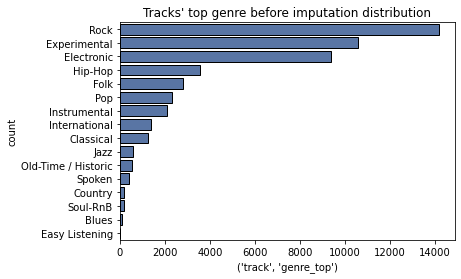

In [240]:
column_name = ('track', 'genre_top')
sns_barplot(tracks, column_name, str(column_name), False, False, "Tracks' top genre before imputation distribution")

In [241]:
three_top_genres = ["Rock", "Experimental", "Electronic"]

In [242]:
rock = tracks[tracks[('track', 'genre_top')] == "Rock"].shape[0] 
rock

14182

In [243]:
experimental = tracks[tracks[('track', 'genre_top')] == "Experimental"].shape[0] 
experimental

10608

In [244]:
electronic = tracks[tracks[('track', 'genre_top')] == "Electronic"].shape[0] 
electronic

9372

In [245]:
rock + experimental + electronic

34162

<h6>Songs NOT having as main genre Rock, Experimental or Electronic</h6>

In [246]:
tracks.shape[0] - (rock + experimental + electronic)

72412

<h6>among which NaN genre_top: </h6>

In [247]:
tracks[(tracks[('track', 'genre_top')].isna())].shape[0]

56976

<h6> so untill genre_top imputation we have a total of NOT Rock, Experimental or Electronic tracks:</h6<

In [248]:
tracks.shape[0] - (rock + experimental + electronic) - tracks[(tracks[('track', 'genre_top')].isna())].shape[0]

15436

<h6>Numerical features</h6>

In [249]:
def normalize_df(df, scaler_flag):
    # for column_name in columns_to_normalize:
    column_names = list(df.columns)
    for column_name in column_names:
        data = df[column_name]
        scaler = None
        if scaler_flag == "min_max":
            scaler = MinMaxScaler()
        elif scaler_flag == "standard":
            scaler = StandardScaler()
        elif scaler_flag == "maxabs":
            scaler = MaxAbsScaler()
        elif scaler_flag == "robust":
            scaler = RobustScaler()
        else:
            print("scaler_flag error")
            sys.exit(-1)
        # fit the model on the feature to normale its values and transform it
        df[column_name] = scaler.fit_transform(df[column_name].values.reshape(-1,1))[:, 0]
    return df

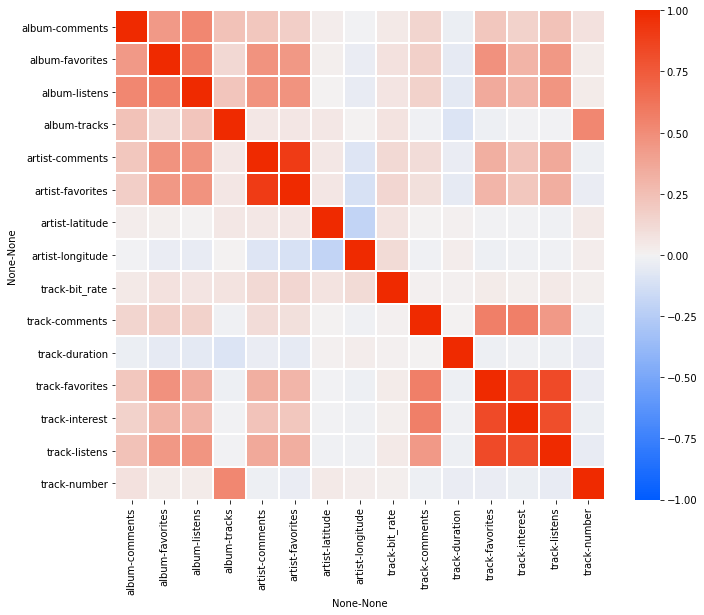

In [250]:
norm_numeric_tracks = numeric_tracks.dropna().copy()  # N.B. = removing NaN values
del norm_numeric_tracks[('album', 'id')]
del norm_numeric_tracks[('artist', 'id')]
norm_numeric_tracks = normalize_df(norm_numeric_tracks, "min_max")
corr = norm_numeric_tracks.corr()


f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(255, 30, 255, as_cmap=True)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = False
heatmap = sns.heatmap(corr, mask=mask, cmap=cmap, center=0.0, vmax = 1, vmin = -1, square=True, linewidths=1, ax=ax)
plt.show()

In [251]:
# investigating negative correlation
threshold = -0.5
for i in range(len(corr.columns)):
    for j in range(i):
        if (corr.iloc[i, j] <= threshold):
            print(corr.columns[i], corr.columns[j], corr.iloc[i, j])

In [252]:
# investigating positive correlation
threshold = 0.5
for i in range(len(corr.columns)):
    for j in range(i):
        if (corr.iloc[i, j] >= threshold):
            print(corr.columns[i], corr.columns[j], corr.iloc[i, j])

('album', 'listens') ('album', 'comments') 0.5237694850080699
('album', 'listens') ('album', 'favorites') 0.5736968534906329
('artist', 'favorites') ('artist', 'comments') 0.9080624795232408
('track', 'favorites') ('track', 'comments') 0.5699743395360148
('track', 'interest') ('track', 'comments') 0.5625378614681774
('track', 'interest') ('track', 'favorites') 0.8309030328748889
('track', 'listens') ('track', 'favorites') 0.8302278182760793
('track', 'listens') ('track', 'interest') 0.8193722868706852
('track', 'number') ('album', 'tracks') 0.529412354755565


From the Pearson Correlation Matrix we detected some medium to hight positive correlated features, which we will proceed to discard in the **Data_Pre_Processing notebook**(<b><font color="red">Please note that, since the imputation is not yet done, correlation among features may still change.</font></b>).

**Keep**: 
- ('track', 'listens');
- ('album', 'tracks');
- ('artist', 'favorites');
- ('album', 'listens') 

**Drop**: 
- ('track', 'interest'), ('track', 'favorites'), ('track', 'comments') => ('track', 'listens');
- ('track', 'number') => ('album', 'tracks'); 
- ('artist', 'comments') => ('artist', 'favorites');
- ('album', 'comments') => ('album', 'listens');
- ('album', 'favorites') => ('album', 'listens'). 

We can get rid also of ('artist',  'latitude') and ('artist', 'longitude'), encoded in ('artist', 'location'), remaining with the following 8 numerical columns:
**[( 'album',        'id'),
            ( 'album',   'listens'),
            ( 'album',    'tracks'),
            ('artist', 'favorites'),
            ('artist',        'id'),
            ( 'track',  'bit_rate'),
            ( 'track',  'duration'),
            ( 'track',   'listens')]**

Keeping in mind these features, in the following we try to understand how each music genre behave, focusing our attention uppon Rock, Experimental and Electronic.

<h6> Top genre track bit-rate insight </h6>

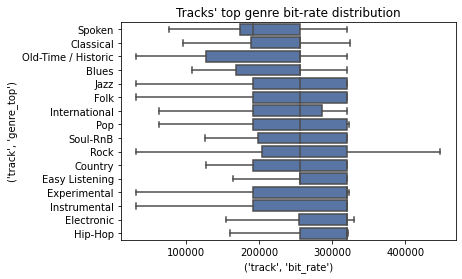

In [253]:
sns_boxplot_ordered_by_mean(tracks, ('track', 'genre_top'), ('track', 'bit_rate'), "Tracks' top genre bit-rate distribution", False)

In [254]:
df_described_based_upon_genres(('track', 'bit_rate'), ["Rock", "Experimental", "Electronic"])

Rock min=-1 max=448000 mean=253943.74136229022 std=59443.3940464669 median=256000.0
Experimental min=-1 max=322892 mean=265434.06919306185 std=67695.1884336293 median=320000.0
Electronic min=-1 max=330042 mean=275473.8409090909 std=63060.35394390153 median=320000.0


In [255]:
tracks[tracks[('track', 'bit_rate')] == -1].shape[0]

105

The top genres with the greatest bit-rate values are: 
- Easy Listening
- Electronic
- Hip-Hop

The top genres with the lowest bit-rate values are: 
- Spoken
- Classical
- Old-Time / Historic
- Blues
- International

The most jumbled bit-rate genres are:
- Jazz
- Folk
- Pop
- Soul-RnB
- Rock
- Country
- Experimental
- Instrumental

All three main genre have a similar duration: lowest **Rock**, middle **Experimental**, highest **Electronic**.

<font color=red>From the lowest bit-rates values we can notice how the **('track', 'bit_rate')** column has **105 missing values**, expressed as **-1** </font> 

<h6> Top genre track duration insight </h6>

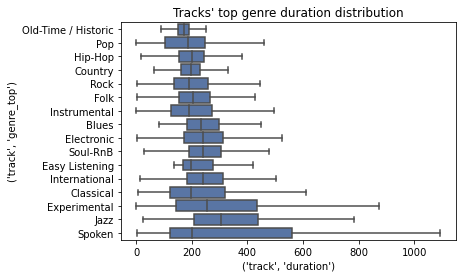

In [256]:
sns_boxplot_ordered_by_mean(tracks, ('track', 'genre_top'), ('track', 'duration'), "Tracks' top genre duration distribution", False)

In [257]:
df_described_based_upon_genres(('track', 'duration'), ["Rock", "Experimental", "Electronic"])

Rock min=2 max=3675 mean=225.49710901142294 std=189.6491108137779 median=189.0
Experimental min=1 max=3718 mean=362.6684577677225 std=390.91486116028665 median=256.0
Electronic min=4 max=3714 mean=263.77069995731966 std=226.63249296466444 median=240.0


All three main genre have a similar duration: lowest **Rock**, middle **Electronic**, highest **Experimental**.

<h6>Top genre track listens</h6>

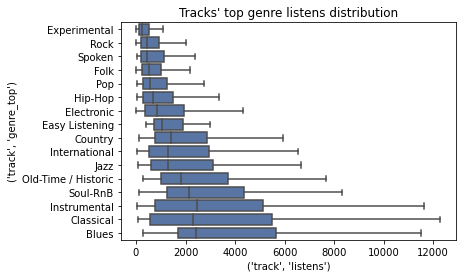

In [258]:
sns_boxplot_ordered_by_mean(tracks, ('track', 'genre_top'), ('track', 'listens'), "Tracks' top genre listens distribution", False)

In [259]:
df_described_based_upon_genres(('track', 'listens'), ["Rock", "Experimental", "Electronic"])

Rock min=9 max=178139 mean=931.3711042166126 std=3085.775630798082 median=427.5
Experimental min=1 max=119301 mean=560.8616138763198 std=2077.0270973220804 median=223.0
Electronic min=7 max=543252 mean=2224.9811139564663 std=8578.22286275248 median=841.0


All three main genre have a similar number of track favorites: lowest **Experimental**, middle **Rock**, highest **Electronic**.

<h6>Top genre album listens</h6>

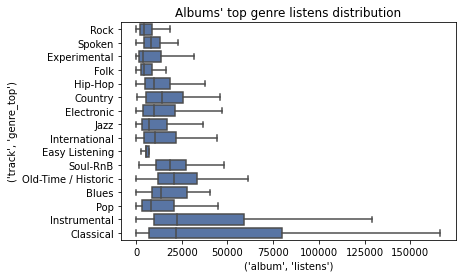

In [260]:
sns_boxplot_ordered_by_mean(tracks, ('track', 'genre_top'), ('album', 'listens'), "Albums' top genre listens distribution", False)

In [261]:
df_described_based_upon_genres(('album', 'listens'), ["Rock", "Experimental", "Electronic"])

Rock min=-1 max=586634 mean=8559.195106472995 std=18776.654264431425 median=4226.5
Experimental min=-1 max=341042 mean=10928.806466817496 std=18156.14782496943 median=3662.0
Electronic min=-1 max=674347 mean=20857.17168160478 std=36651.580259980634 median=9839.0


All three main genre have a similar number of album listens: lowest **Rock**, middle **Experimental**, highest **Electronic**.

<h6>Top genre album tracks</h6>

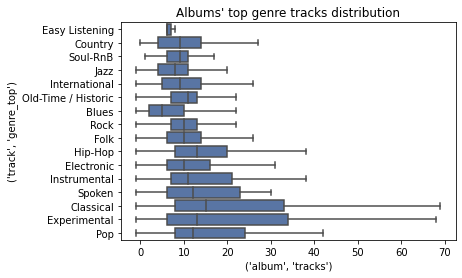

In [262]:
sns_boxplot_ordered_by_mean(tracks, ('track', 'genre_top'), ('album', 'tracks'), "Albums' top genre tracks distribution", False)

In [263]:
df_described_based_upon_genres(('album', 'tracks'), ["Rock", "Experimental", "Electronic"])

Rock min=-1 max=108 mean=11.931885488647582 std=12.003490669997804 median=10.0
Experimental min=-1 max=652 mean=37.39432503770739 std=82.45935346532876 median=13.0
Electronic min=-1 max=155 mean=16.93854033290653 std=26.269505661010985 median=10.0


All three main genre have a similar number of album tracks: lowest **Rock**, middle **Electronic**, highest **Experimental**.

<h6>Top genre artist favorites</h6>

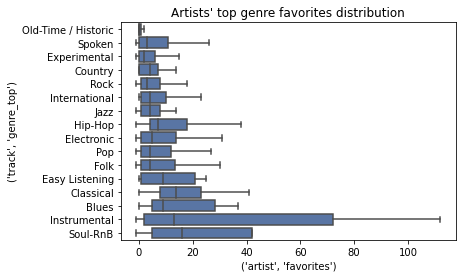

In [264]:
sns_boxplot_ordered_by_mean(tracks, ('track', 'genre_top'), ('artist', 'favorites'), "Artists' top genre favorites distribution", False)

In [265]:
df_described_based_upon_genres(('artist', 'favorites'), ["Rock", "Experimental", "Electronic"])

Rock min=-1 max=788 mean=8.638908475532364 std=33.853502724707816 median=3.0
Experimental min=-1 max=788 mean=8.194287330316742 std=24.722101290991706 median=2.0
Electronic min=-1 max=963 mean=18.932351685872813 std=66.45568792896633 median=5.0


All three main genre have a similar number of artist favorites: lowest **Experimental**, middle **Rock**, highest **Electronic**.

<b>
RECAP:

<font color="green"> 

Based on each track's numeric feature, we discovered that: 
    
- Electronic has the highest values in bit_rate, number of listenings (both per track and per album) and as a conseguence artists' favorites;
- Experimental has the longuest tracks and the most copius track presence in albums;
- Rock has the lowest bit-rate, numeber of listenings and number of tracks per album. 
    
However, the values are very similar among all three genre, so we can't clearly state real discriminante features.
</font>
</b>

<h6> Categorical features </h6>

In [413]:
# TODo transform date_obj -> datetime
# spli datetime in year and season
# plot rop genre's categorical distributions 

In [414]:
# converting columns relative to dates to datetime64[ns] type
dates_columns = [('album', 'date_created'), ('album', 'date_released'), ('artist', 'active_year_begin'), 
                 ('artist', 'active_year_end'), ('artist', 'date_created'), ('track', 'date_created'),
                 ('track', 'date_recorded')]
for dcolumn in dates_columns:
    tracks[dcolumn] = pd.to_datetime(tracks[dcolumn], infer_datetime_format=True)

In [418]:
def check_missing_values(column_name1, column_name2):
    tmp_df = tracks[(tracks[column_name1].isna())][column_name2]
    print(column_name1, "missing values=%s" % tmp_df.shape[0], "unique missing values=%s" %len(tmp_df.unique()))
    
    if column_name1[0] != "track":
        count = 0
        for aid in tmp_df.unique():
            tmp = tracks[~(tracks[column_name1].isna()) & (tracks[column_name2] == aid)]
            if tmp.shape[0] > 0:
                count += 1
        print(count)

In [419]:
for dcolumn in dates_columns:
    id_flag = 'id'
    if dcolumn[0] == 'track':
        id_flag = 'title'
    check_missing_values(dcolumn, (dcolumn[0], id_flag))

('album', 'date_created') missing values=3529 unique missing values=1483
0
('album', 'date_released') missing values=36280 unique missing values=6428
0
('artist', 'active_year_begin') missing values=83863 unique missing values=15087
0
('artist', 'active_year_end') missing values=101199 unique missing values=16020
0
('artist', 'date_created') missing values=856 unique missing values=232
0
('track', 'date_created') missing values=0 unique missing values=0
('track', 'date_recorded') missing values=100415 unique missing values=90036


We will keep only **('album', 'date_created'), ('artist', 'date_created'), ('track', 'date_created')** since these are the coloumns having the least number of missing values (('track', 'date_created') actually hasn't any NaN value).

In [483]:
def draw_univocal_date_histplot(df, column_name, date_flag, log_flag, xlim_flag, hue):
    tmp_df = df.copy()
    if column_name[0] != "track":
        tmp_df = tmp_df[[column_name, (column_name[0], 'id')]].drop_duplicates(subset=[(column_name[0], 'id')])
    if date_flag == "year":
        if hue == "":
            sns.histplot(tmp_df[column_name].dt.year, color="#4C72B0")
        else:
            sns.histplot(tmp_df[column_name].dt.year, hue=hue, multiple="dodge")
    elif date_flag == "month":
        if hue == "":
            sns.histplot(tmp_df[column_name].dt.month, color="#4C72B0")
        else:
            sns.histplot(tmp_df[column_name].dt.month, hue=hue, multiple="dodge")
    else:
        print("date_flag error")
        sys.exit(-1)
    if log_flag:
        plt.yscale('log')
    plt.title("%s\'s %sly distribution" % (str(column_name), date_flag))
    if xlim_flag:
        if date_flag == "year":
            plt.xlim(tracks[column_name].dt.year.min(), tracks[column_name].dt.year.max())
        else:
            plt.xticks(np.arange(1, 12, 1))
    plt.show()

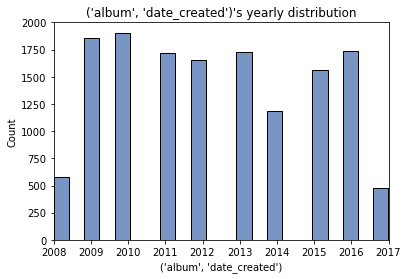

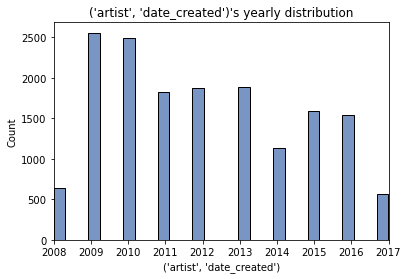

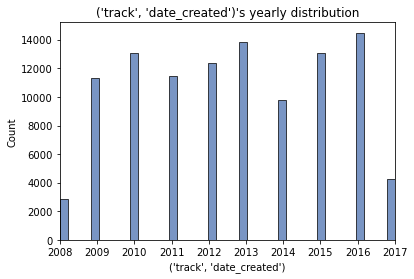

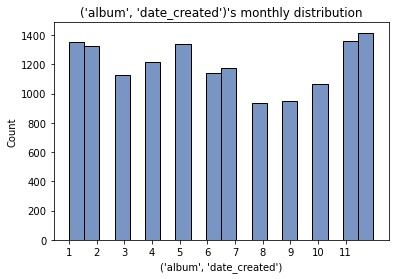

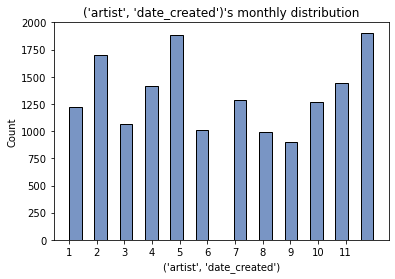

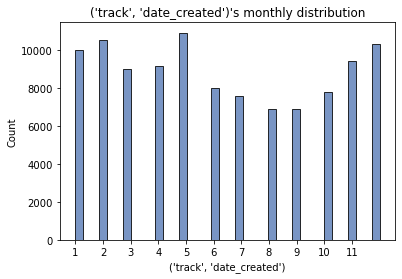

In [475]:
dates_columns_kept = [('album', 'date_created'), ('artist', 'date_created'), ('track', 'date_created')]
for d in dates_columns_kept:
    draw_univocal_date_histplot(tracks, d, "year", False, True, "")

for d in dates_columns_kept:
    draw_univocal_date_histplot(tracks, d, "month", False, True, "")

In [490]:
"""three_tracks = tracks[(tracks[('track', 'genre_top')] == "Rock") |
       (tracks[('track', 'genre_top')] == "Experimental") |
       (tracks[('track', 'genre_top')] == "Electronic") ]

for d in dates_columns_kept:
    draw_univocal_date_histplot(three_tracks, d, "year", False, True, ('track', 'genre_top'))
    draw_univocal_date_histplot(three_tracks, d, "month", False, True, ('track', 'genre_top'))"""

'three_tracks = tracks[(tracks[(\'track\', \'genre_top\')] == "Rock") |\n       (tracks[(\'track\', \'genre_top\')] == "Experimental") |\n       (tracks[(\'track\', \'genre_top\')] == "Electronic") ]\n\nfor d in dates_columns_kept:\n    draw_univocal_date_histplot(three_tracks, d, "year", False, True, (\'track\', \'genre_top\'))\n    draw_univocal_date_histplot(three_tracks, d, "month", False, True, (\'track\', \'genre_top\'))'

Rock


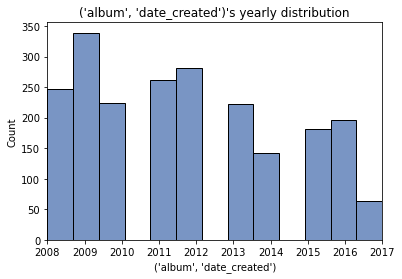

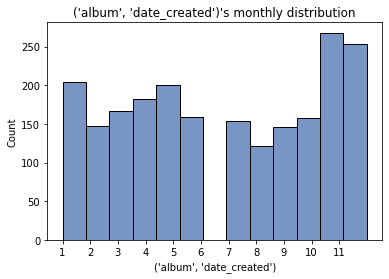

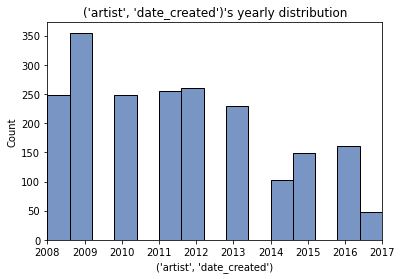

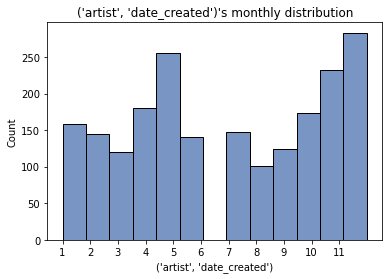

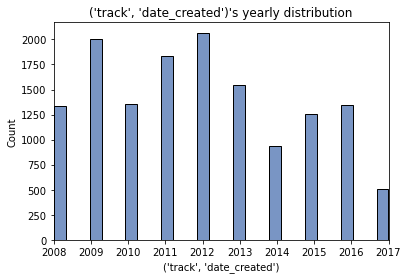

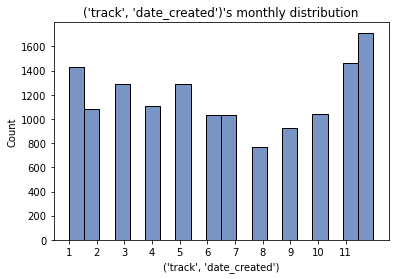

Experimental


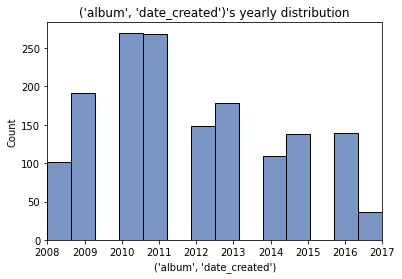

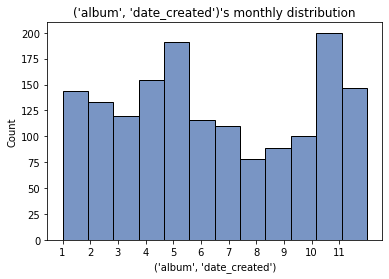

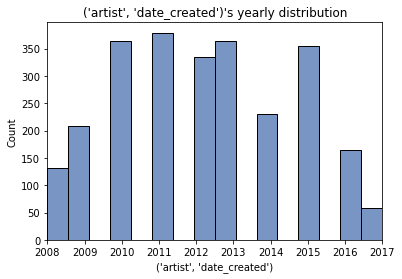

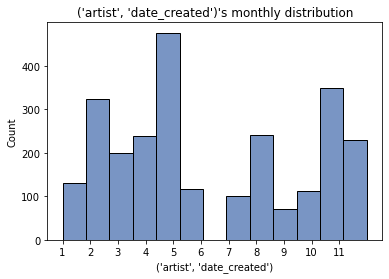

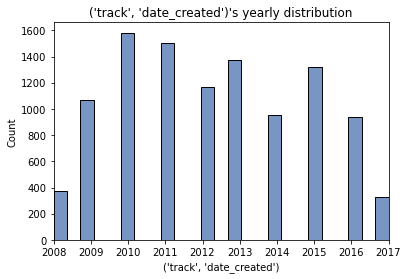

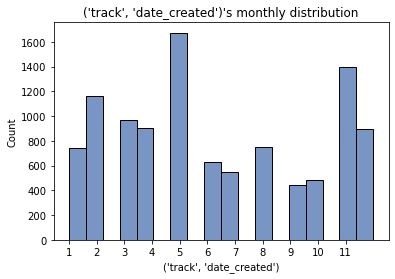

Electronic


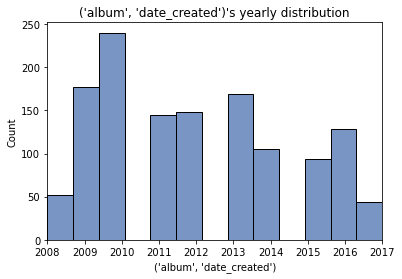

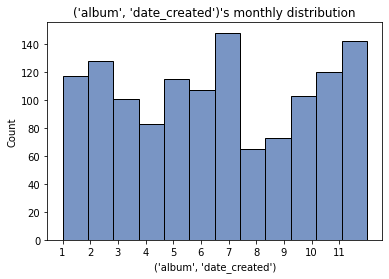

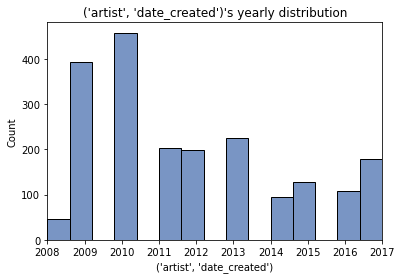

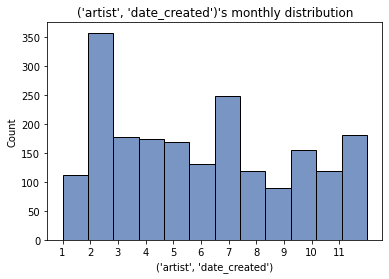

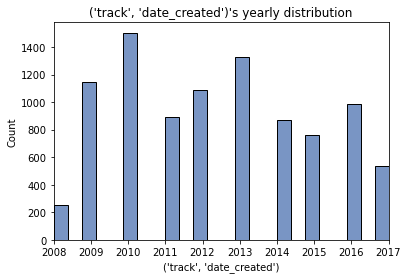

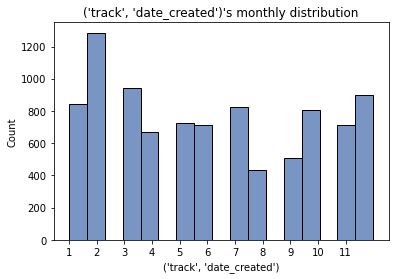

In [478]:
three_genres = ["Rock", "Experimental", "Electronic"]
for genre in three_genres:
    print(genre)
    dates_columns_kept = [('album', 'date_created'), ('artist', 'date_created'), ('track', 'date_created')]
    for d in dates_columns_kept:
        draw_univocal_date_histplot(tracks[tracks[('track', 'genre_top')] == genre], d, "year", False, True)
        draw_univocal_date_histplot(tracks[tracks[('track', 'genre_top')] == genre], d, "month", False, True)

<h2> Tracks' condensed genre_top understanding </h2>

In [149]:
cond_tracks = tracks.copy()

In [ ]:
# TODO: modified above analysis

<h2>Echonest features </h2>

For **13,129 tracks**, we have 2 pools of audio and temporal features (**93,445 tracks** apparently don't have them):

- **audio_features**:
    1. acousticness
    2. danceability
    3. energy
    4. instrumentalness	
    5. liveness	
    6. speechiness	
    7. tempo
    8. valence    

- **temporal_features**:
    1. '000'
    ... 
    
    223. '223'
    
<font color=red> Our main problem in using the audio feature is however that only **12.32%** of tracks share this info. Among our main genre_top tracks we also notice a high imbalance, due to the fact that we have audio features only for:
- 3892 Rock  (27.44%)
- 17 Experimental (0.16%)
- 2170 Electronic  (23.15%)

</font>

In [14]:
echonestData = pd.read_csv('../../data/fma_metadata/echonest.csv',index_col=0, header=[0, 1, 2])
echonestData.shape

(13129, 249)

In [15]:
echonestData.head().T

track_id                                           2          3    \
echonest audio_features    acousticness       0.416675   0.374408   
                           danceability       0.675894   0.528643   
                           energy             0.634476   0.817461   
                           instrumentalness  0.0106281  0.0018511   
                           liveness           0.177647    0.10588   
...                                                ...        ...   
         temporal_features 219                 0.06408    0.06413   
                           220                 3.67696    6.08277   
                           221                 3.61288    6.01864   
                           222                 13.3167    16.6735   
                           223                  262.93    325.581   

track_id                                             5         10         134  
echonest audio_features    acousticness        0.0435669   0.95167   0.452217  
                           danceability         0.745566  0.658179   0.513238  
                           energy                0.70147  0.924525    0.56041  
                           instrumentalness  0.000696799  0.965427  0.0194427  
                           liveness             0.373143  0.115474  0.0965667  
...                                                  ...       ...        ...  
         temporal_features 219                   0.06014   0.08082     0.0644  
                           220                   5.92649   8.41401    11.2671  
                           221                   5.86635   8.33319    11.2027  
                           222                   16.0138   21.3171    26.4542  
                           223                   356.756   483.404    751.148  

[249 rows x 5 columns]

In [16]:
audioFeatures = echonestData['echonest']['audio_features']
audioFeatures.head()

acousticness  danceability    energy  instrumentalness  liveness  \
track_id                                                                     
2             0.416675      0.675894  0.634476          0.010628  0.177647   
3             0.374408      0.528643  0.817461          0.001851  0.105880   
5             0.043567      0.745566  0.701470          0.000697  0.373143   
10            0.951670      0.658179  0.924525          0.965427  0.115474   
134           0.452217      0.513238  0.560410          0.019443  0.096567   

          speechiness    tempo   valence  
track_id                                  
2            0.159310  165.922  0.576661  
3            0.461818  126.957  0.269240  
5            0.124595  100.260  0.621661  
10           0.032985  111.562  0.963590  
134          0.525519  114.290  0.894072

<h6>Checking how many tracks haven't audio features in the whole dataset</h6>

In [17]:
tracks_ids = list(tracks.index.values)
echonest_ids = list(audioFeatures.index.values)
print(len(set(tracks_ids).difference(set(echonest_ids))))

93445


<h6>Checking genre_top distribution among audio features</h6>

In [18]:
audioFeaturesTotalSet=audioFeatures.merge(tracks, left_index=True, right_index=True, how='inner')
audioFeaturesTotalSet.shape

/home/alexandra/anaconda3/lib/python3.8/site-packages/pandas/core/reshape/merge.py:618: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


(13129, 60)

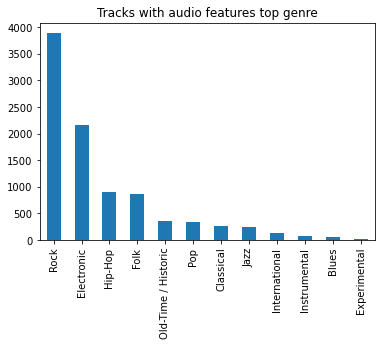

In [19]:
audioFeaturesTotalSet[[('track', 'genre_top')]].apply(pd.value_counts).plot(kind='bar', legend=False, title="Tracks with audio features top genre")
plt.show()

In [20]:
top_genres = ["Rock", "Experimental", "Electronic"]
for genre_top in top_genres:
    print(genre_top, audioFeaturesTotalSet[audioFeaturesTotalSet[('track', 'genre_top')] == genre_top].shape[0],
     str((audioFeaturesTotalSet[audioFeaturesTotalSet[('track', 'genre_top')] == genre_top].shape[0] /
       tracks[tracks[('track', 'genre_top')] == genre_top].shape[0])*100) + "%")

Rock 3892 27.44323790720632%
Experimental 17 0.16025641025641024%
Electronic 2170 23.15407597097738%


We discover that only **Rock** and **Electronic** tracks have audio features (Experimental tracks are almost deprived about the info). 

<h6>Checking if exist differences among Rock, Experimental and Electronic tracks</h6>

In [25]:
def plotTopGenreFeatures(df, genreTitle, colour):
    features = [np.median(df['acousticness'][df[('track', 'genre_top')] == genreTitle]), 
              np.median(df['danceability'][df[('track', 'genre_top')] == genreTitle]),
              np.median(df['energy'][df[('track', 'genre_top')] == genreTitle]),
              np.mean(df['instrumentalness'][df[('track', 'genre_top')] == genreTitle]),
              np.median(df['liveness'][df[('track', 'genre_top')] == genreTitle]),
              np.median(df['speechiness'][df[('track', 'genre_top')] == genreTitle]),
              np.median(df['tempo'][df[('track', 'genre_top')] == genreTitle]),
              np.median(df['valence'][df[('track', 'genre_top')] == genreTitle])]
    features[-2] = features[-2]/251
    features[-3] = features[-3] * 4
    features += features[:1]
    ax.plot(angles, features, color=colour, linewidth = 1, label = genreTitle)
    ax.fill(angles, features, color=colour, alpha = 0.25)

In [21]:
tracks_top = tracks[(tracks[('track', 'genre_top')] == 'Electronic') |
                    (tracks[('track', 'genre_top')] == 'Experimental') |
                    (tracks[('track', 'genre_top')] == 'Rock')]
tracks_top.shape

(34162, 52)

In [22]:
audioFeaturesSetA=audioFeatures.merge(tracks_top, left_index=True, right_index=True, how='inner')
audioFeaturesSetA.shape

(6079, 60)

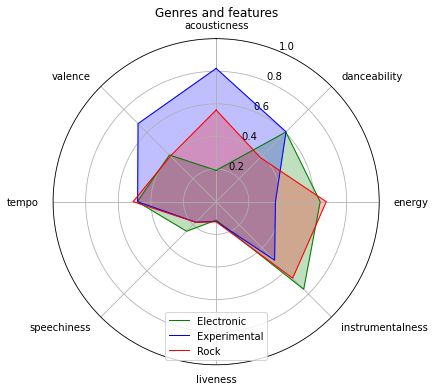

In [26]:
num_vars=len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

plotTopGenreFeatures(audioFeaturesSetA, 'Electronic','green')
plotTopGenreFeatures(audioFeaturesSetA, 'Experimental','blue')
plotTopGenreFeatures(audioFeaturesSetA, 'Rock','red')

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles), labels)

for label, angle in zip(ax.get_xticklabels(), angles):
  if angle in (0, np.pi):
    label.set_horizontalalignment('center')
  elif 0 < angle < np.pi:
    label.set_horizontalalignment('left')
  else:
    label.set_horizontalalignment('right')

ax.set_ylim(0, 1)
ax.set_rlabel_position(180 / num_vars)
ax.set_title('Genres and features')
ax.legend(loc='lower center')
plt.show()

From the above radar plot we can notice that:

- **Experimental** music is defined by greater **valence** and **acousticness** values;
- **Electronic** and **Rock** music have almost overlllaping audio feature, with slighter higher **acousticness** value for **Rock** and higher **danceability, instrumentalness** and **speechiness** values for **Electronic**.

<h6>Checking if exist differences among Rock, Experimental, Electronic and Other tracks</h6>

In [27]:
tracks_four = tracks[~(tracks[('track', 'genre_top')].isna())]
tracks_four.shape

(49598, 52)

In [28]:
# replacing all genre_top with "Other" if not belonging to Electronic, Experimental, Rock
genre_top_map = {}
genre_tops = list(tracks[('track', 'genre_top')].unique())
for genre_top in genre_tops:
    if str(genre_top) == "nan":
        continue
    if str(genre_top) == "Electronic" or str(genre_top) == "Experimental" or str(genre_top) == "Rock":
        genre_top_map[str(genre_top)] = genre_top
    else:
         genre_top_map[str(genre_top)] = "Other"
tracks_four[('track', 'genre_top')] = tracks_four[('track', 'genre_top')].map(genre_top_map)
tracks_four[('track', 'genre_top')].unique()

<ipython-input-28-dad7c69cda1a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tracks_four[('track', 'genre_top')] = tracks_four[('track', 'genre_top')].map(genre_top_map)


array(['Other', 'Rock', 'Experimental', 'Electronic'], dtype=object)

In [29]:
audioFeaturesSetB = audioFeatures.merge(tracks_four, left_index=True, right_index=True, how='inner')
audioFeaturesSetB.shape

/home/alexandra/anaconda3/lib/python3.8/site-packages/pandas/core/reshape/merge.py:618: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


(9355, 60)

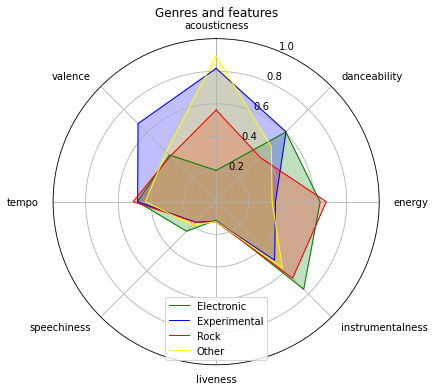

In [32]:
num_vars=len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

plotTopGenreFeatures(audioFeaturesSetB, 'Electronic','green')
plotTopGenreFeatures(audioFeaturesSetB, 'Experimental','blue')
plotTopGenreFeatures(audioFeaturesSetB, 'Rock','red')
plotTopGenreFeatures(audioFeaturesSetB, 'Other','yellow')

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles), labels)

for label, angle in zip(ax.get_xticklabels(), angles):
  if angle in (0, np.pi):
    label.set_horizontalalignment('center')
  elif 0 < angle < np.pi:
    label.set_horizontalalignment('left')
  else:
    label.set_horizontalalignment('right')

ax.set_ylim(0, 1)
ax.set_rlabel_position(180 / num_vars)
ax.set_title('Genres and features')
ax.legend(loc='lower center')
plt.show()

From the above radar plot we can notice that:

- **Experimental** music is defined by greater **valence** and **acousticness** values;
- **Electronic** and **Rock** music have almost overlllaping audio feature, with slighter higher **acousticness** value for **Rock** and higher **danceability, instrumentalness** and **speechiness** values for **Electronic**;
- **Other** music has greater **acousticness** values and **skrinked other audio features**.

We can finally notice how the <font color=red>audio features liveness, speechiness and tempo are the most overlapping </font> (and so probably the lest relevant features in the models' features selection process).

<h2> Librosa features </h2> 

For each 106,572 tracks, we have 518 Librosa features, having the following cardinalities:

1. **chroma_cens** = 12
2. **chroma_cqt** = 12
3. **chroma_stft** = 12
4. **mfcc** = 20
5. **rmse** = 1
6. **spectral_bandwidth** = 1
7. **spectral_centroid** = 1
8. **spectral_contrast** = 7
9. **spectral_rolloff** = 1
10. **tonnetz** = 6
11. **zcr** = 1

and for each cardinality feature we have the following information:
1. min = min feature's value;
2. max = max feature's value;
3. median = median feature's value;
4. mean = avg feature's values;
5. std = std feature's values;
6. skew = feature's values asymmetry distribution
7. kurtosis = feature's values tailedness distribution

In [33]:
librosaFeatures = pd.read_csv('../../data/fma_metadata/features.csv', index_col=0, header=[0, 1, 2])
librosaFeatures.shape

(106574, 518)

In [34]:
librosaFeatures.head(2)

feature    chroma_cens                                                    \
statistics    kurtosis                                                     
number              01        02        03        04        05        06   
track_id                                                                   
2             7.180653  5.230309  0.249321  1.347620  1.482478  0.531371   
3             1.888963  0.760539  0.345297  2.295201  1.654031  0.067592   

feature                                             ...   tonnetz            \
statistics                                          ...       std             
number            07        08        09        10  ...        04        05   
track_id                                            ...                       
2           1.481593  2.691455  0.866868  1.341231  ...  0.054125  0.012226   
3           1.366848  1.054094  0.108103  0.619185  ...  0.063831  0.014212   

feature                    zcr                                               \
statistics            kurtosis       max      mean    median  min      skew   
number            06        01        01        01        01   01        01   
track_id                                                                      
2           0.012111  5.758890  0.459473  0.085629  0.071289  0.0  2.089872   
3           0.017740  2.824694  0.466309  0.084578  0.063965  0.0  1.716724   

feature               
statistics       std  
number            01  
track_id              
2           0.061448  
3           0.069330  

[2 rows x 518 columns]

In [35]:
librosa_columns = {}
librosa_columns_info = set()
for c in librosaFeatures.columns:
    librosa_columns_info.add(c[1])
    try:
        if librosa_columns[str(c[0])] < c[2]:
            librosa_columns[str(c[0])] = c[2]
    except KeyError:
        librosa_columns[str(c[0])] = c[2]
print("Librosa columns:", librosa_columns)
print("Librosa columns info:", librosa_columns_info)

Librosa columns: {'chroma_cens': '12', 'chroma_cqt': '12', 'chroma_stft': '12', 'mfcc': '20', 'rmse': '01', 'spectral_bandwidth': '01', 'spectral_centroid': '01', 'spectral_contrast': '07', 'spectral_rolloff': '01', 'tonnetz': '06', 'zcr': '01'}
Librosa columns info: {'mean', 'median', 'kurtosis', 'skew', 'std', 'max', 'min'}


<h6>Checking librosa features among Rock, Experimental and Electronic genre_top tracks</h6>

In [36]:
librosaSetA = librosaFeatures.merge(tracks_top, left_index=True, right_index=True, how='inner')
librosaSetA.shape

/home/alexandra/anaconda3/lib/python3.8/site-packages/pandas/core/reshape/merge.py:618: UserWarning: merging between different levels can give an unintended result (3 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


(34162, 570)

/home/alexandra/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


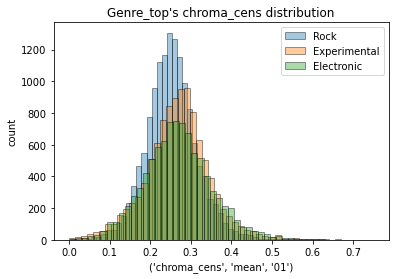

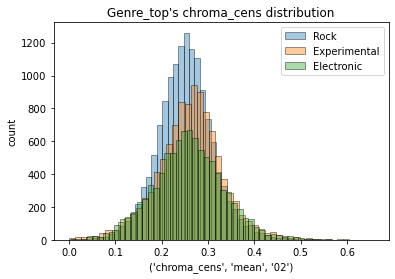

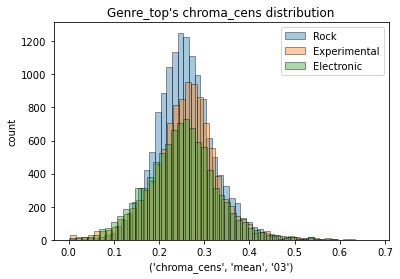

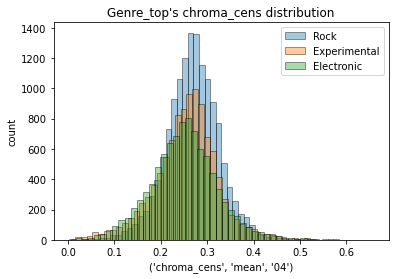

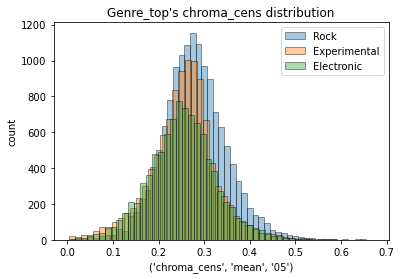

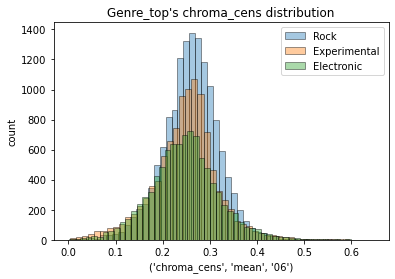

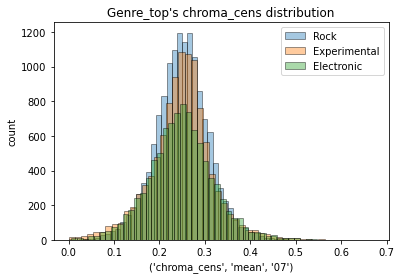

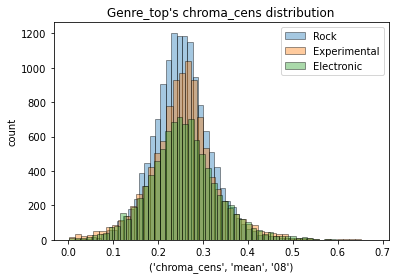

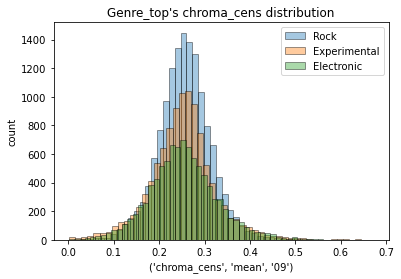

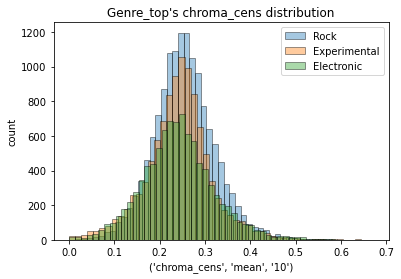

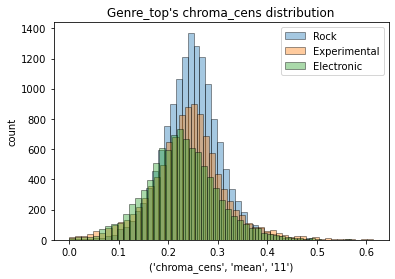

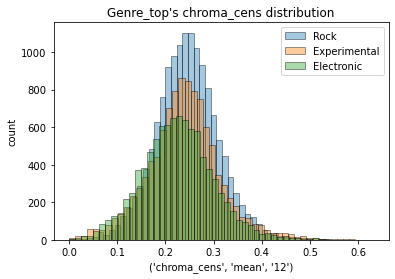

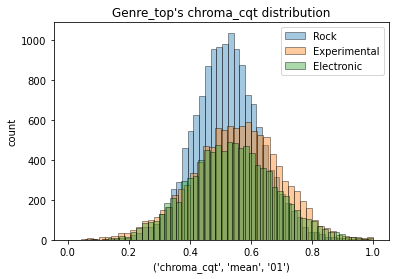

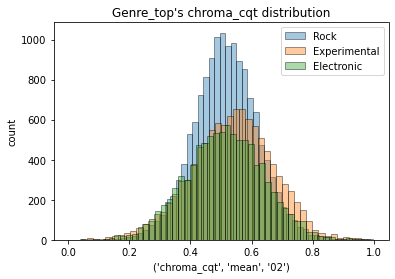

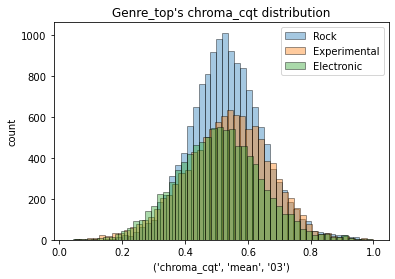

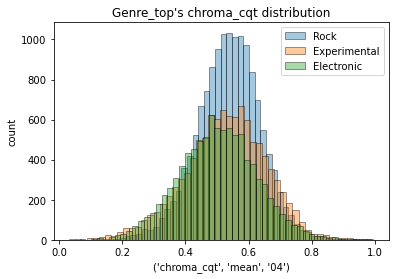

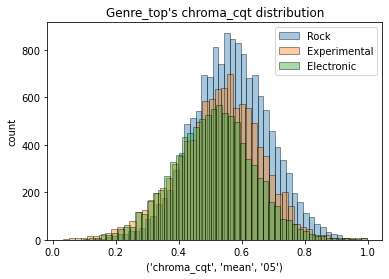

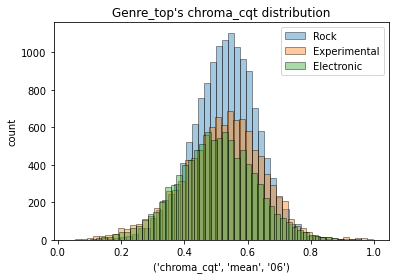

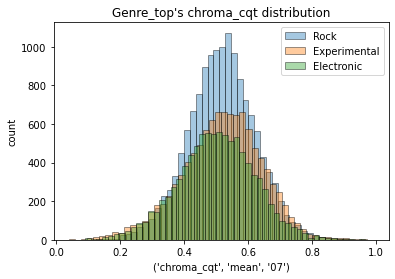

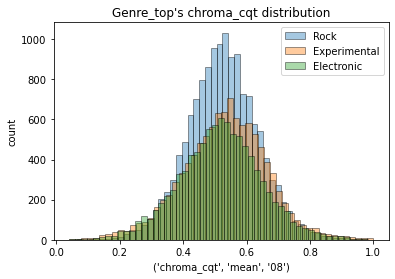

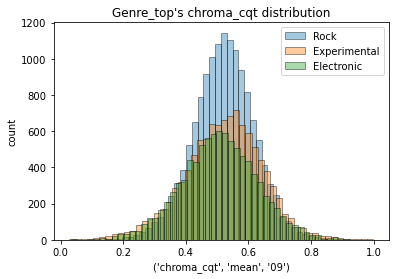

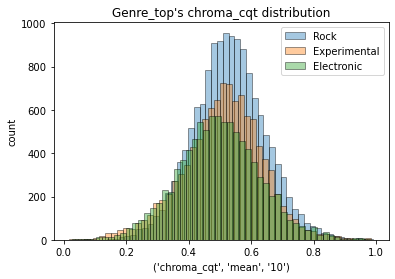

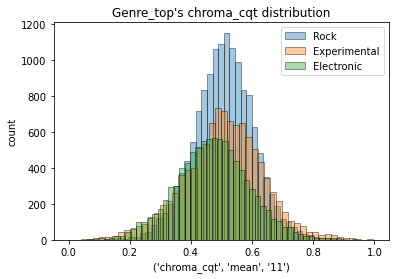

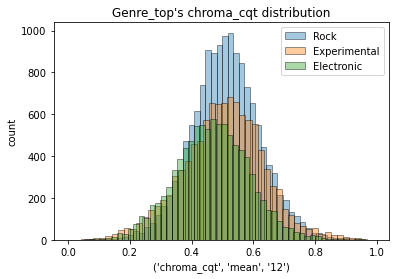

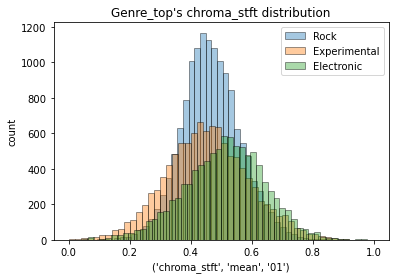

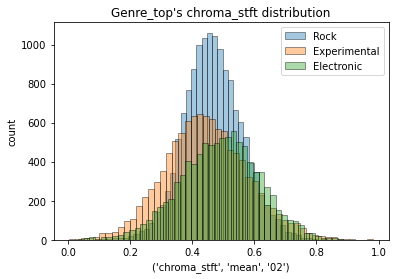

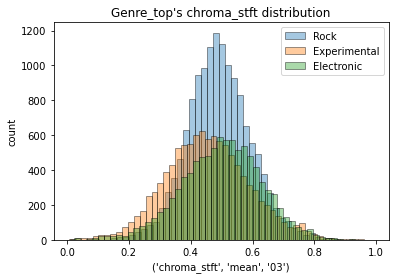

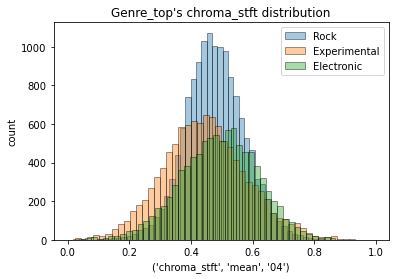

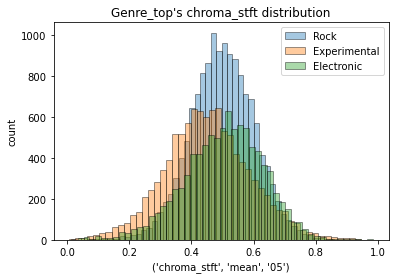

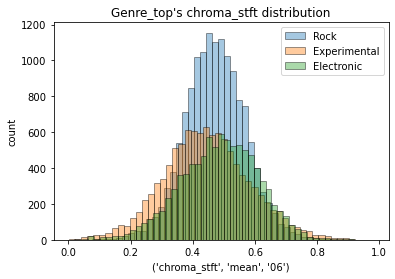

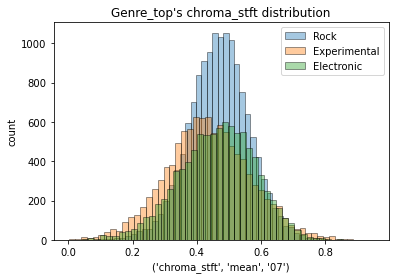

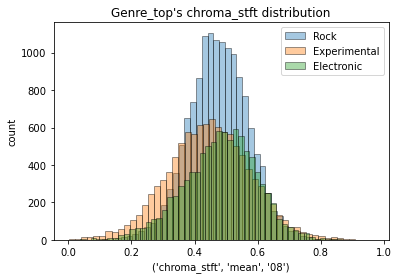

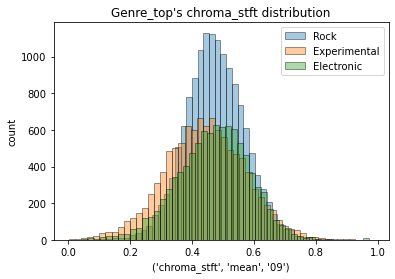

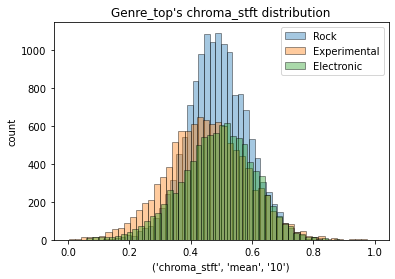

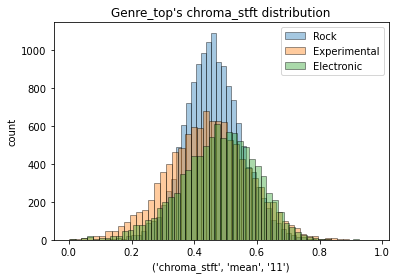

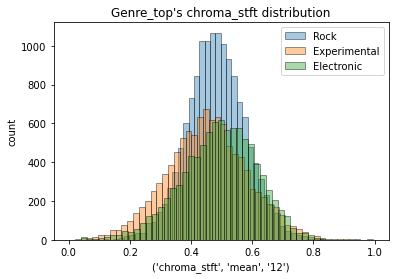

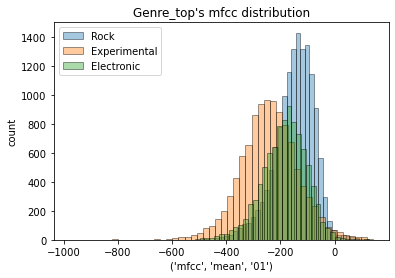

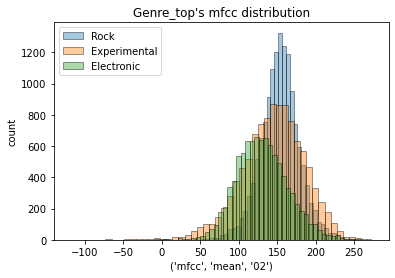

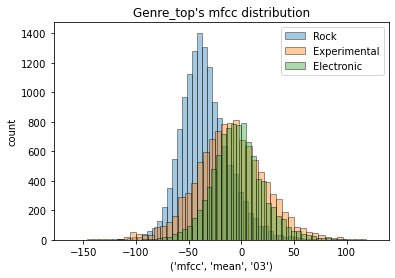

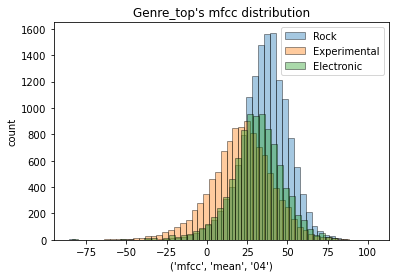

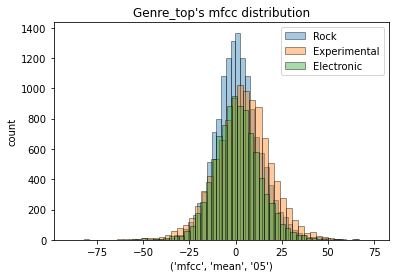

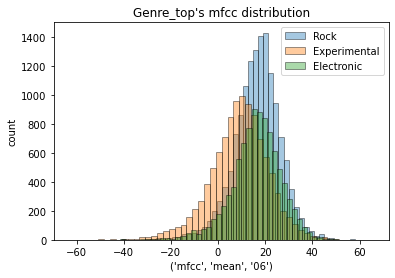

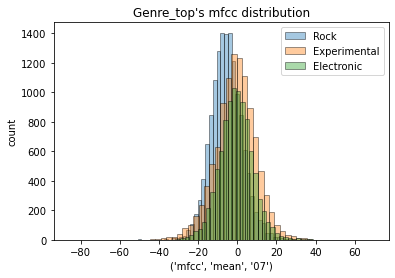

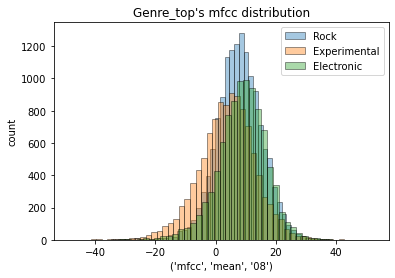

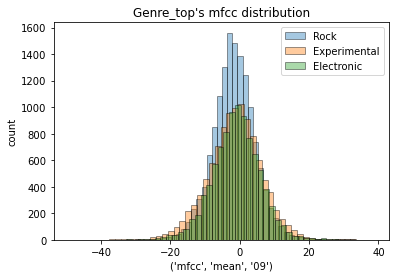

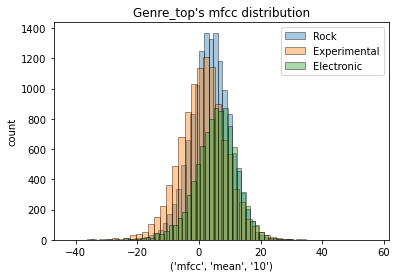

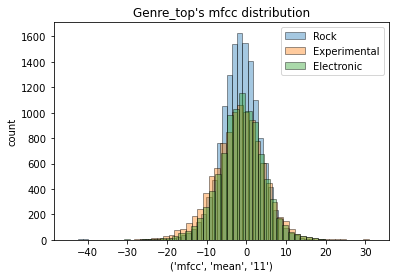

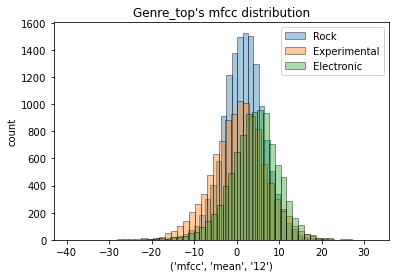

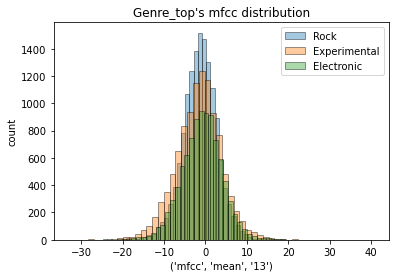

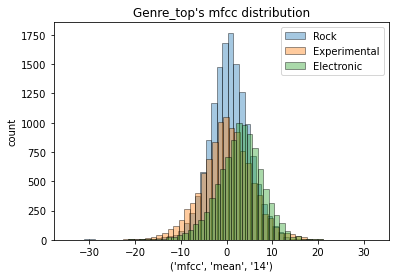

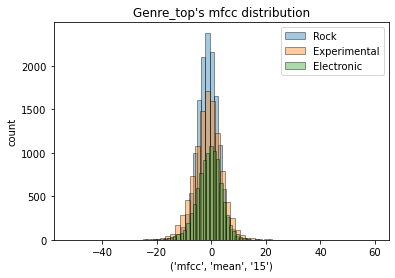

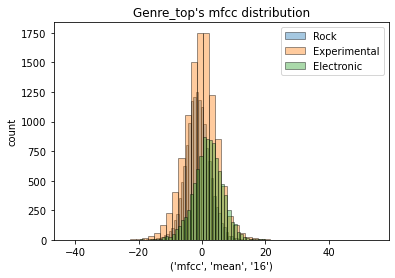

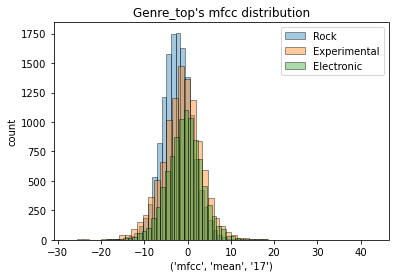

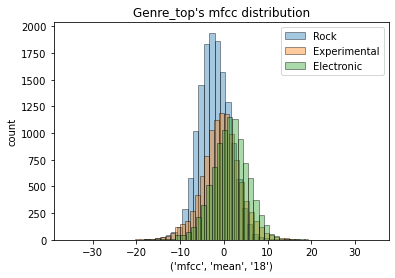

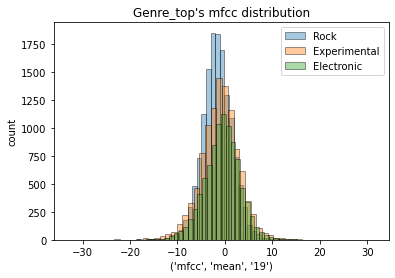

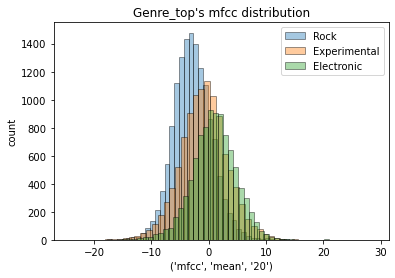

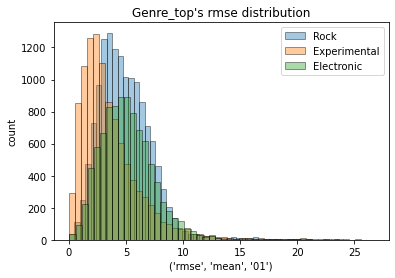

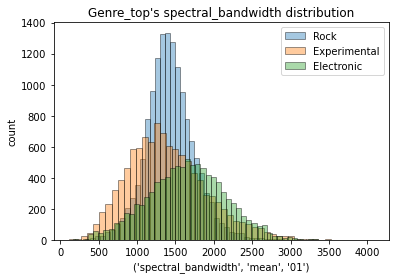

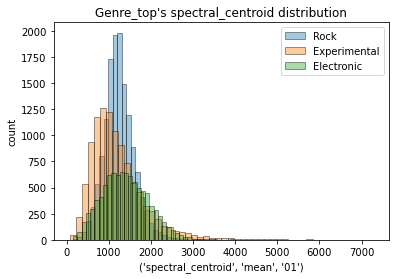

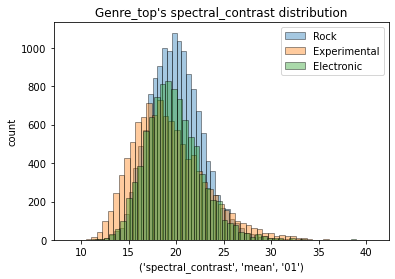

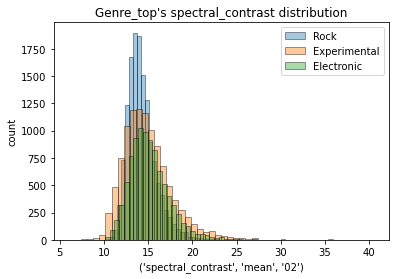

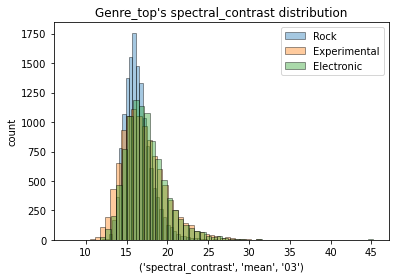

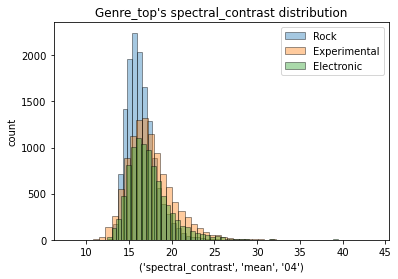

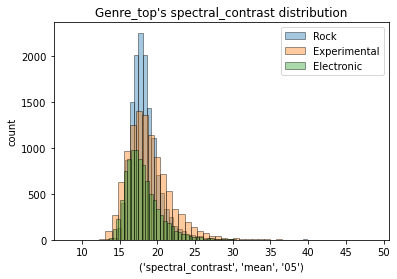

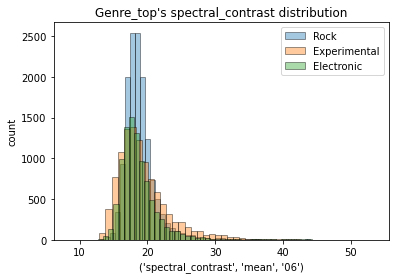

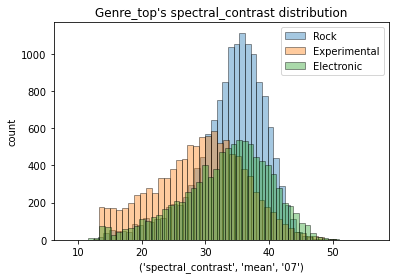

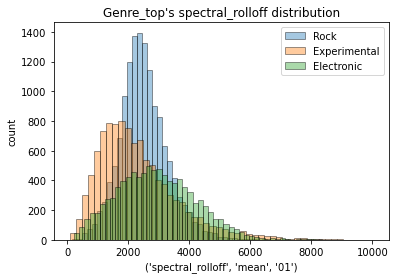

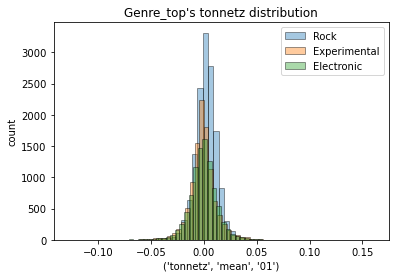

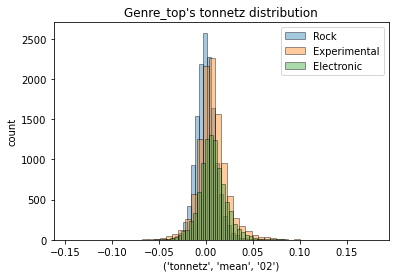

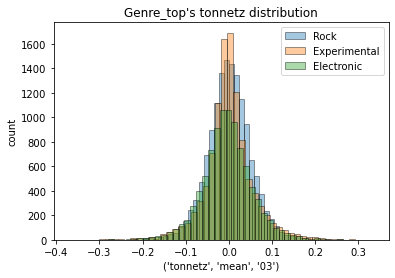

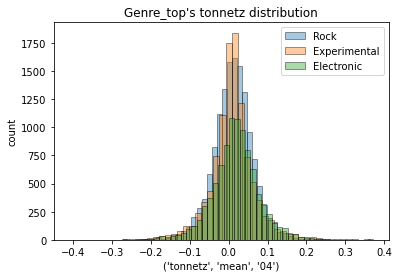

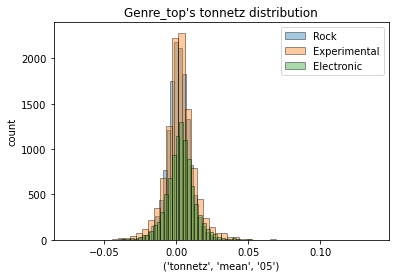

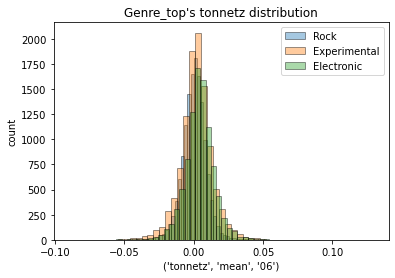

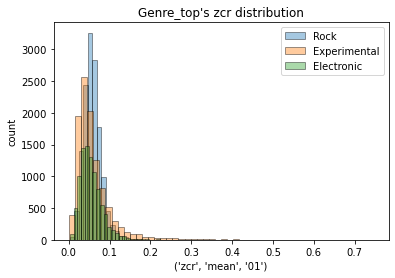

In [37]:
top_genres = ["Rock", "Experimental", "Electronic"]
for var in librosaSetA.columns:
    if var[1] != "mean":
        continue
    for genre_top in top_genres:
        sns.distplot(librosaSetA[librosaSetA[('track', 'genre_top')] == genre_top][var], kde=False, label=genre_top)
    plt.ylabel("count")
    plt.legend()
    plt.title("Genre_top's " + var[0] + " distribution")
    plt.show()

From the above plots we can observe that the following librosa are so characterized:
- all ('chroma_cens', 'mean', '*') are related to ('chroma_cens', 'mean', '01');
- all ('chroma_cqt', 'mean', '*') are related to ('chroma_cqt', 'mean', '01');
- all ('chroma_stft', 'mean', '*') are related to ('chroma_stft', 'mean', '01');
- all ('mfcc', 'mean', '*') are different among them;
- ('rmse', 'mean', '01') is unique in its kind;
- ('spectral_bandwidth', 'mean', '01') is unique in its kind;
- ('spectral_centroid', 'mean', '01') is unique in its kind;
- ('spectral_rolloff', 'mean', '01') is unique in its kind;
- ('spectral_contrast', 'mean', '01'), ('spectral_contrast', 'mean', '07') are unique in their kind, 
  all the other ('spectral_contrast', 'mean', '*') are related to ('spectral_contrast', 'mean', '02');
- ('tonnetz', 'mean', '01') and ('tonnetz', 'mean', '02') are unique in their kind, all the other
  ('tonnetz', 'mean', '*') are related to ('tonnetz', 'mean', '03');
- ('zcr', 'mean', '01') is unique in it kind.

Taking into account only the Rock, Experimental and Electronic as genre_top, we will need to use **34 librosa features** to discriminated among these music genres.

<h6>Checking librosa features among Rock, Experimental, Electronic and Other genre_top tracks</h6>

In [38]:
librosaSetB = librosaFeatures.merge(tracks_four, left_index=True, right_index=True, how='inner')
librosaSetB.shape

(49598, 570)

In [39]:
librosaSetB[librosaSetB[('track', 'genre_top')] == "Other"][('zcr', 'mean', '01')]

track_id
2         0.085629
3         0.084578
5         0.053114
10        0.077515
134       0.064370
            ...   
155302    0.041585
155303    0.030033
155304    0.048426
155305    0.027366
155306    0.031542
Name: (zcr, mean, 01), Length: 15436, dtype: float64

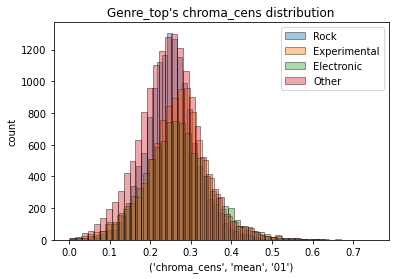

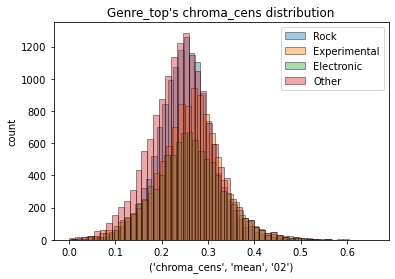

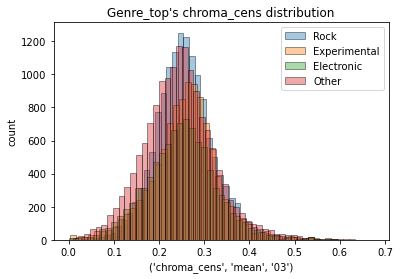

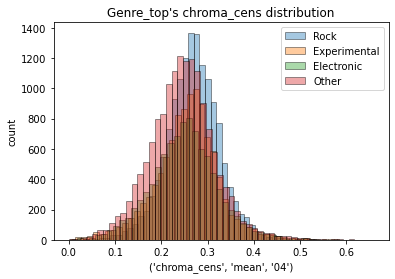

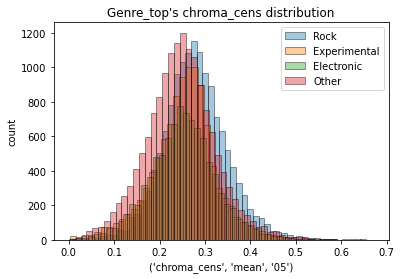

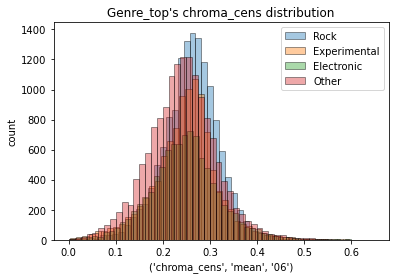

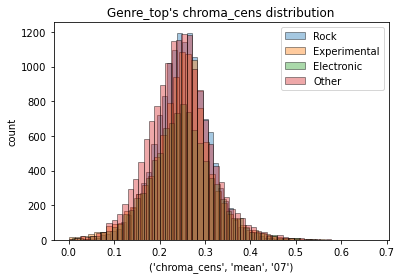

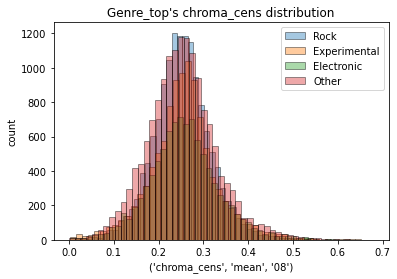

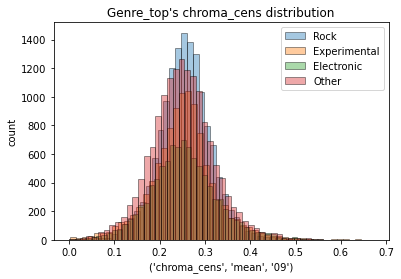

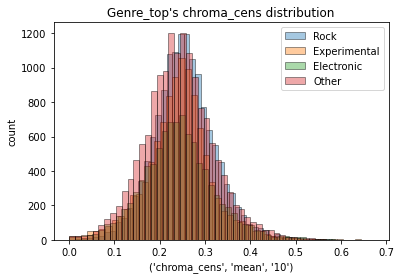

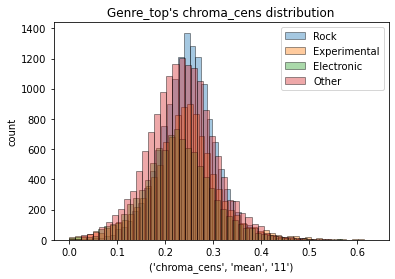

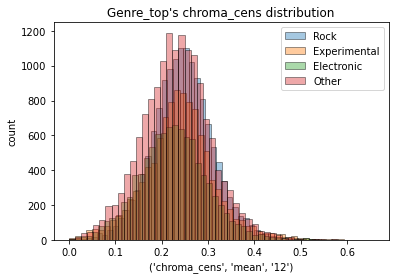

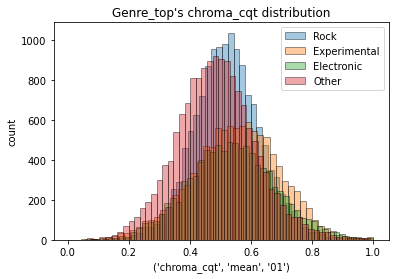

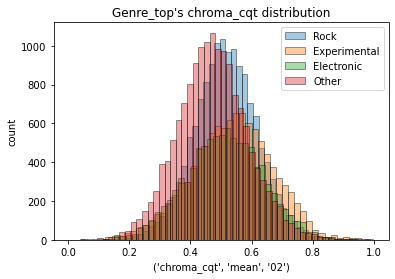

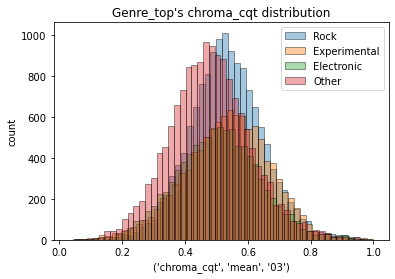

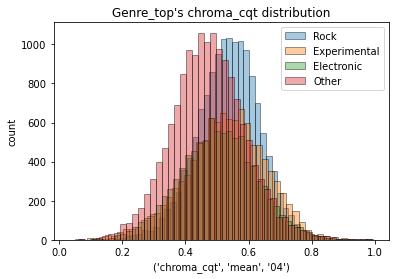

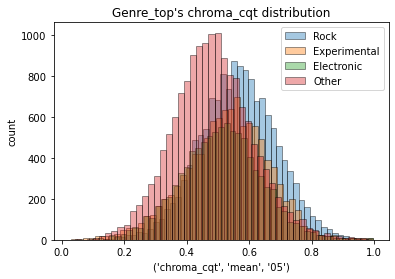

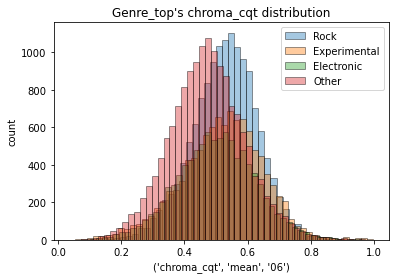

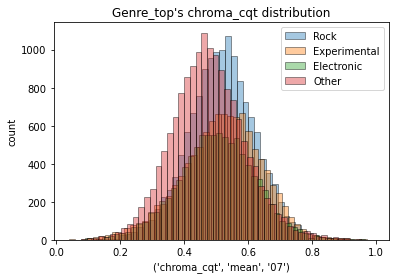

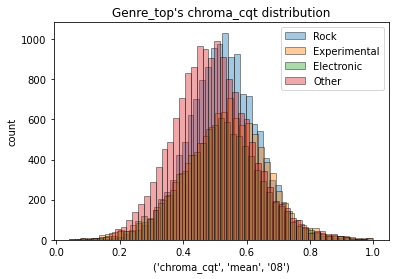

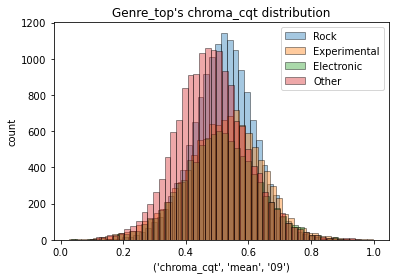

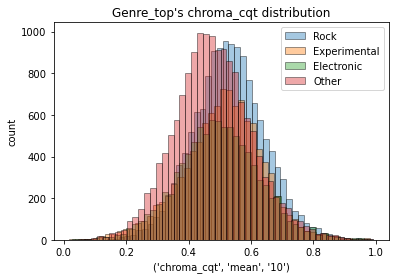

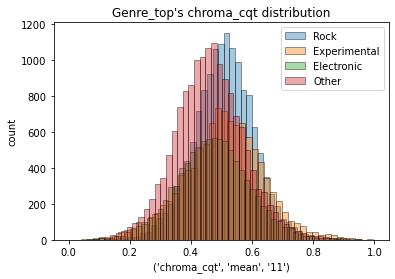

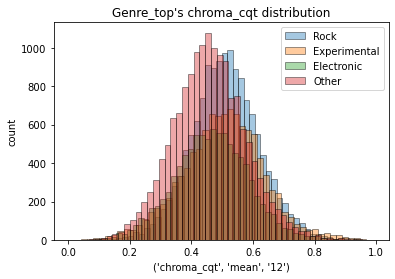

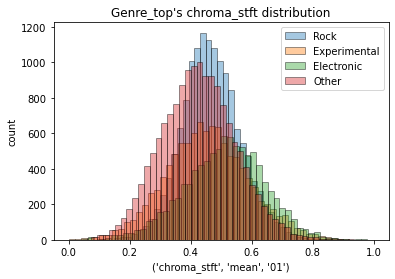

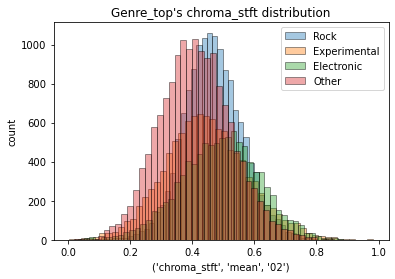

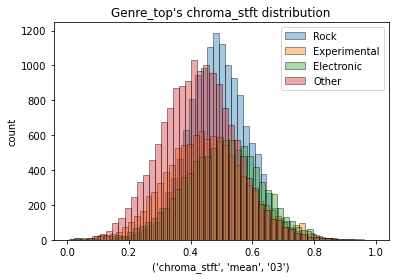

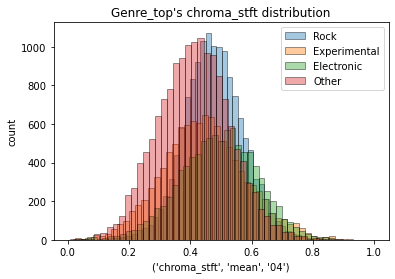

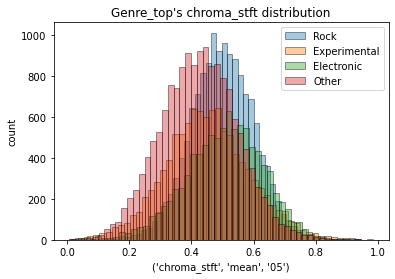

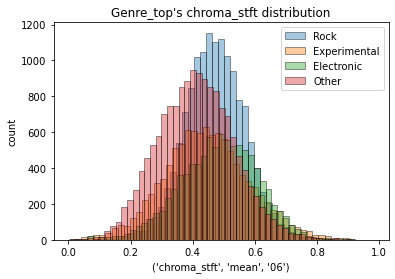

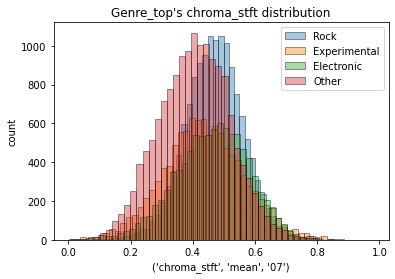

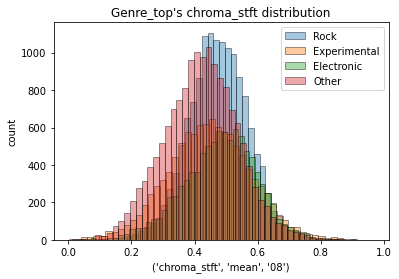

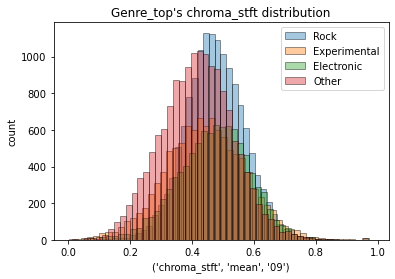

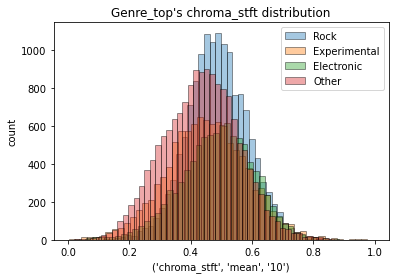

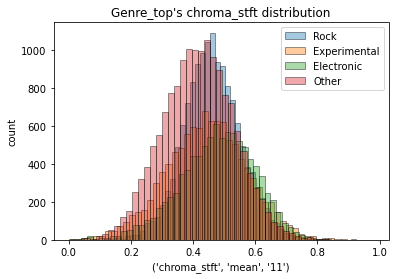

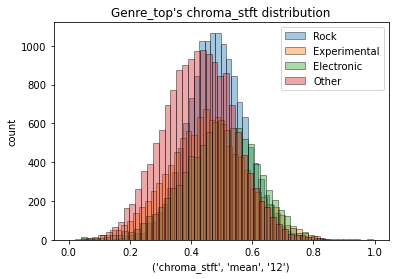

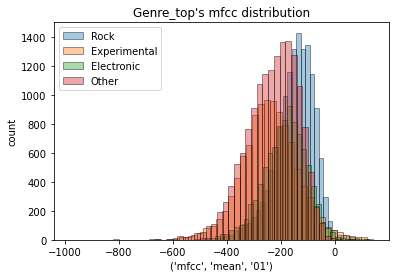

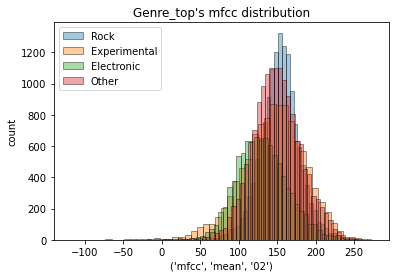

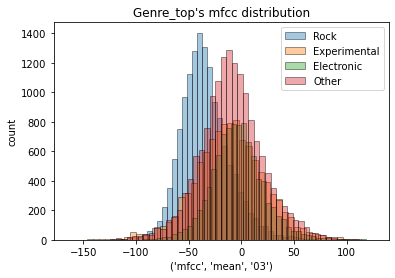

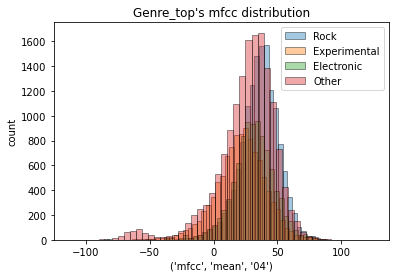

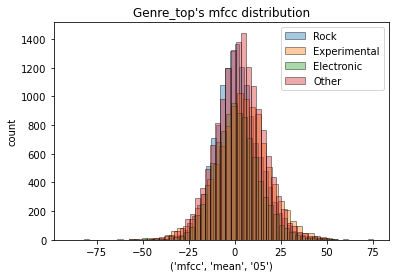

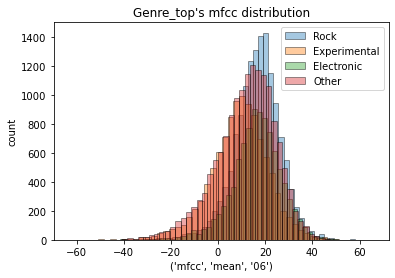

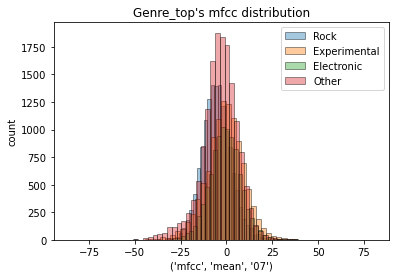

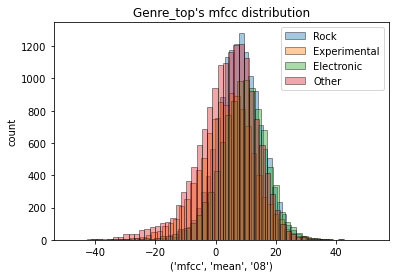

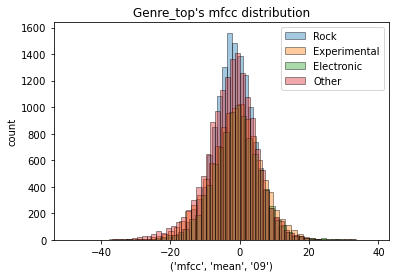

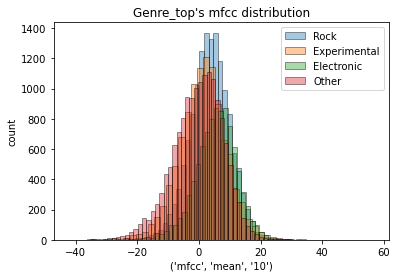

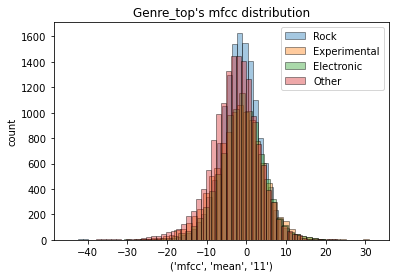

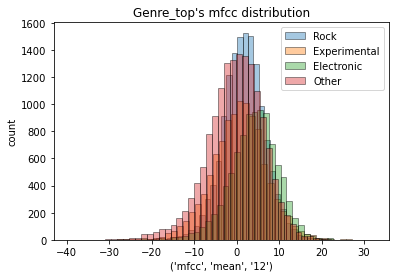

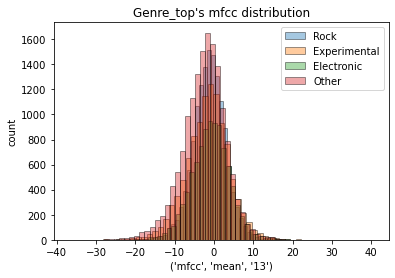

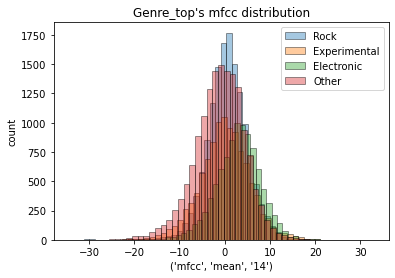

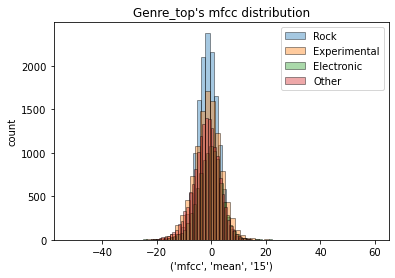

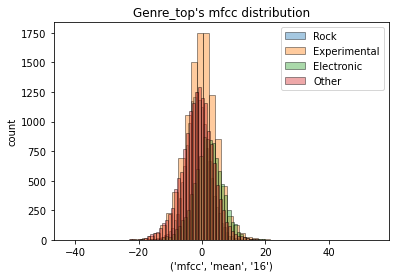

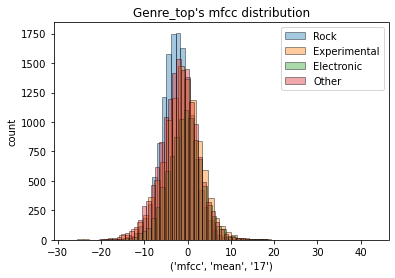

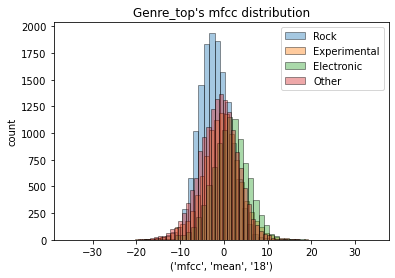

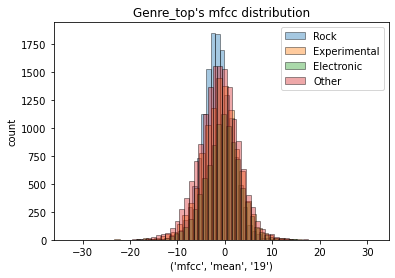

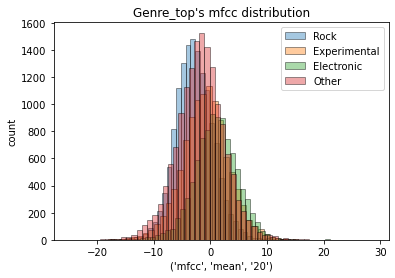

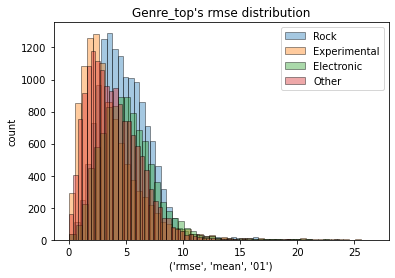

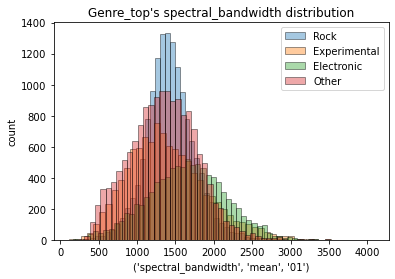

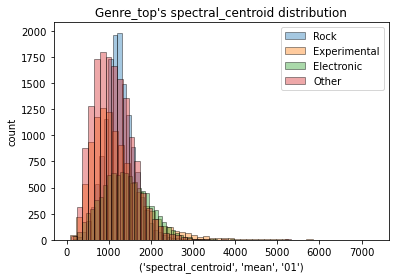

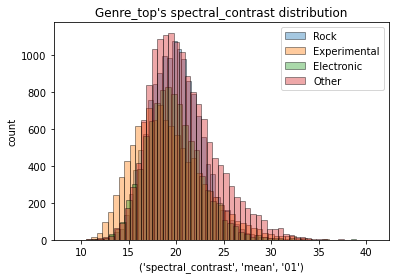

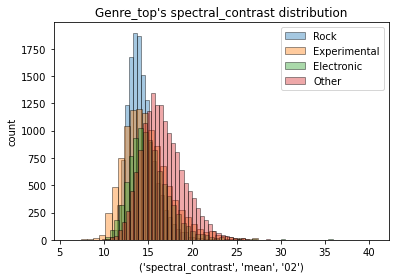

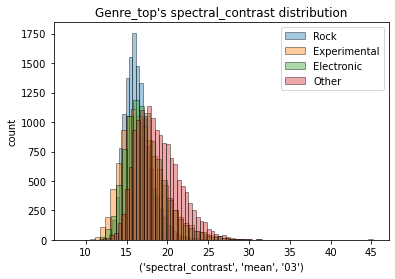

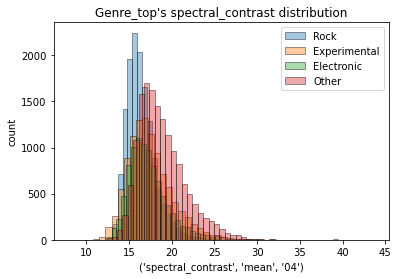

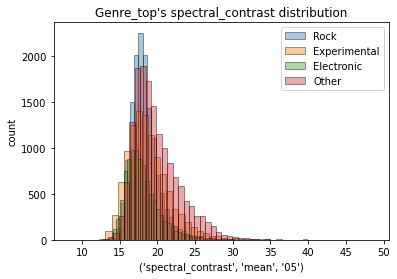

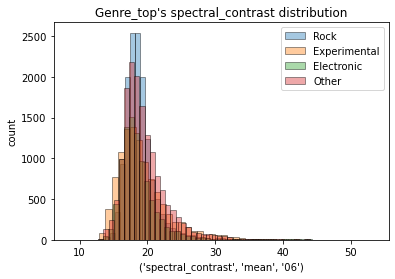

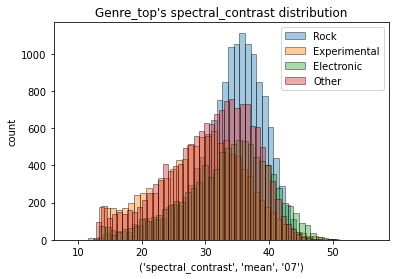

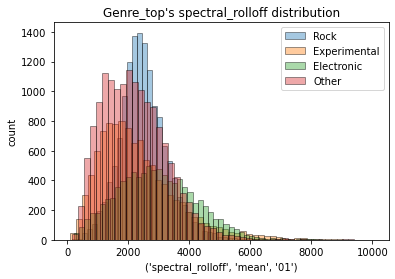

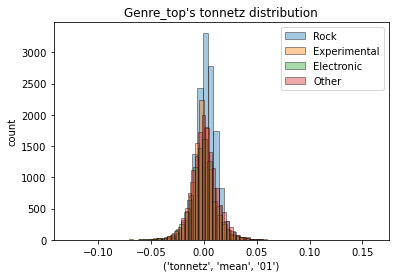

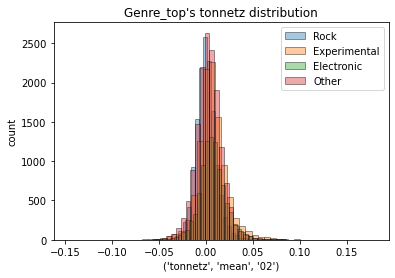

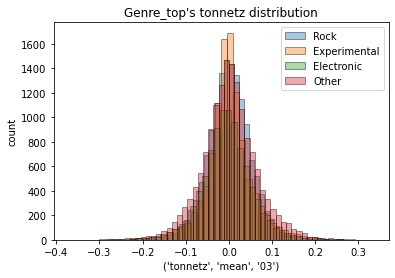

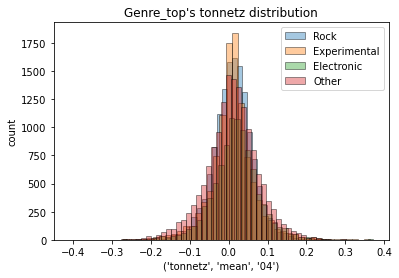

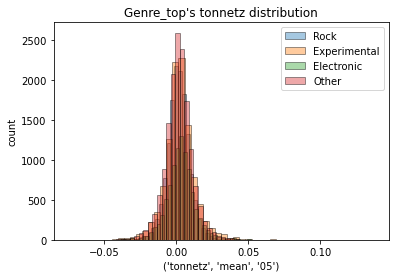

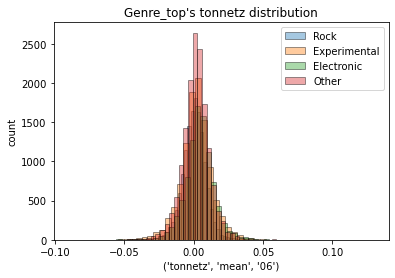

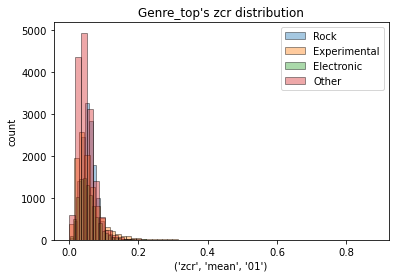

In [40]:
plt.rcParams["patch.force_edgecolor"] = True
top_genres = ["Rock", "Experimental", "Electronic", "Other"]
for var in librosaSetB.columns:
    if var[1] != "mean":
        continue
    for genre_top in top_genres:
        sns.distplot(librosaSetB[librosaSetB[('track', 'genre_top')] == genre_top][var], kde=False, label=genre_top)
    plt.ylabel("count")
    plt.legend()
    plt.title("Genre_top's " + var[0] + " distribution")
    plt.show()

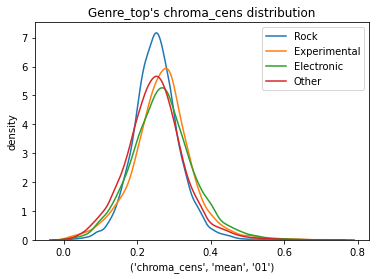

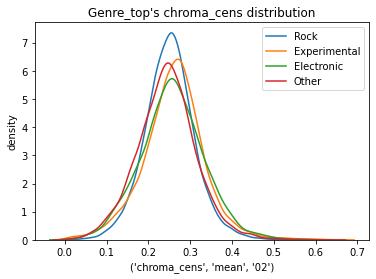

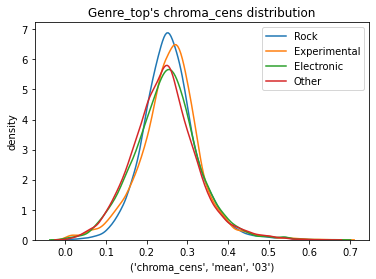

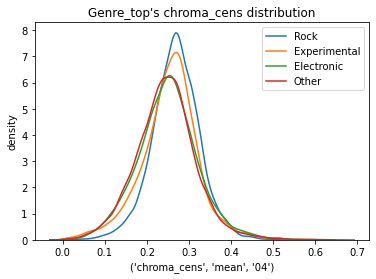

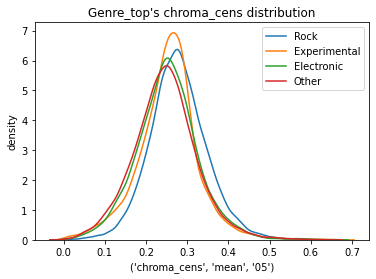

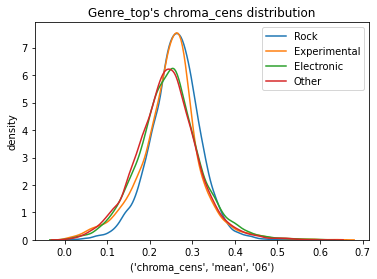

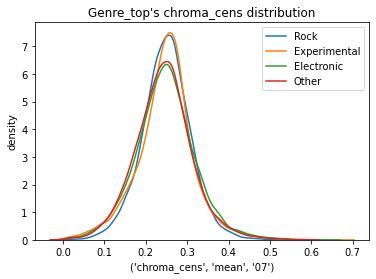

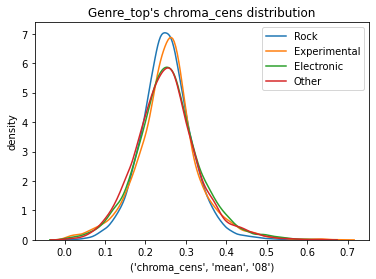

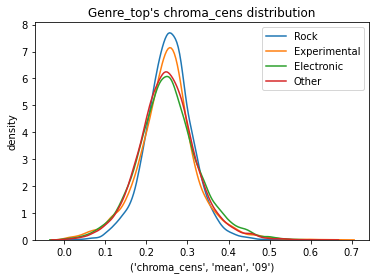

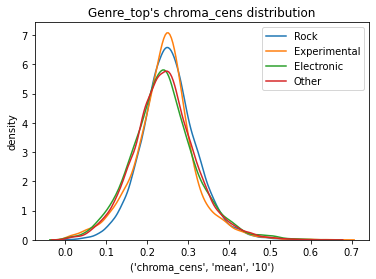

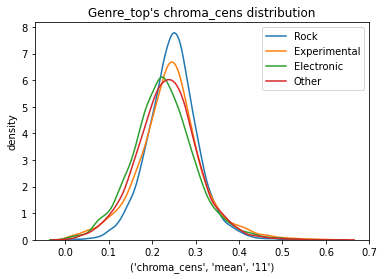

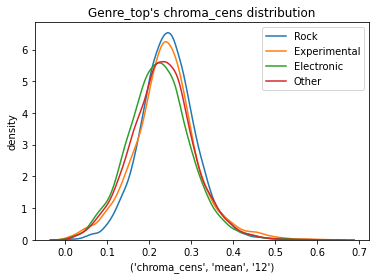

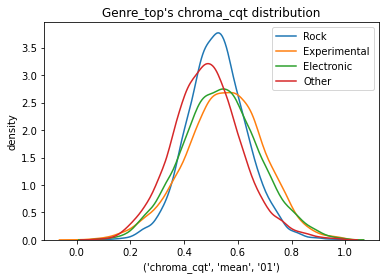

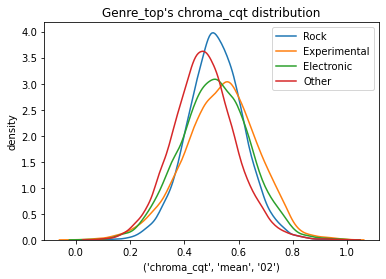

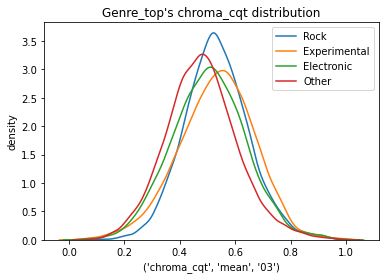

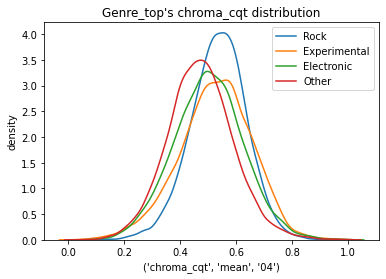

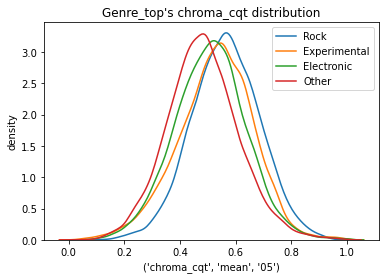

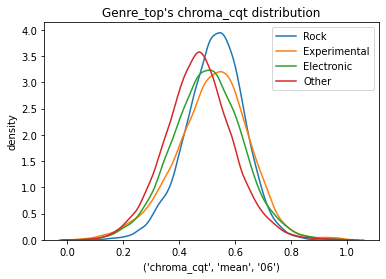

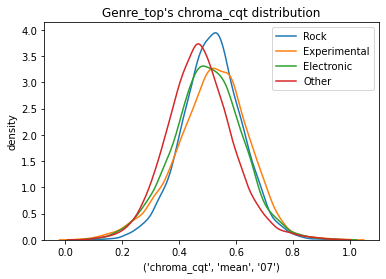

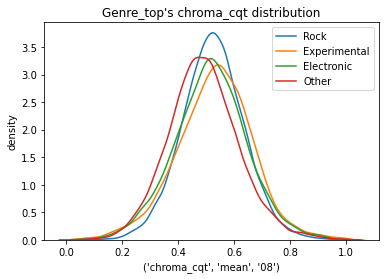

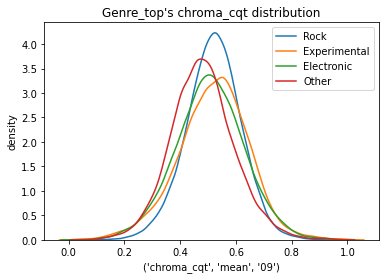

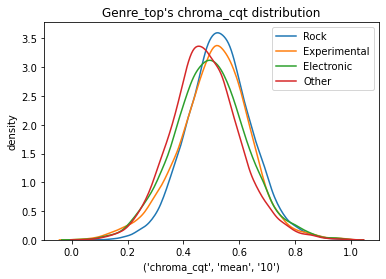

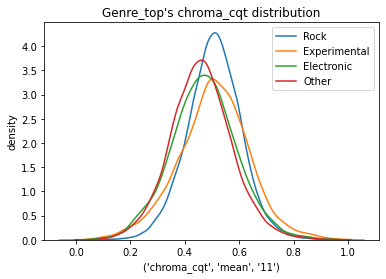

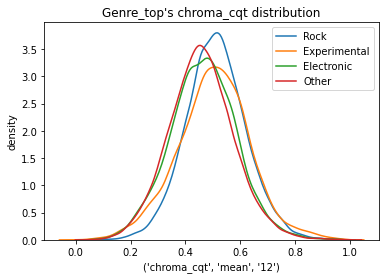

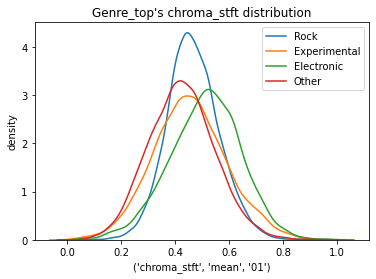

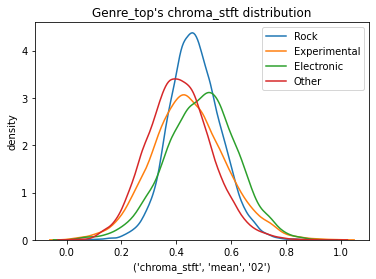

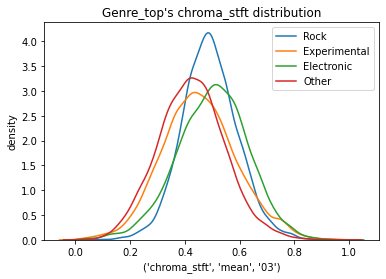

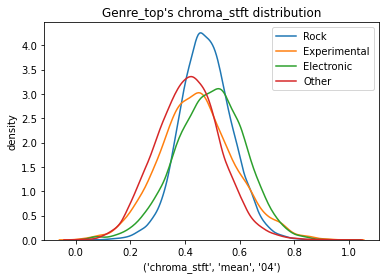

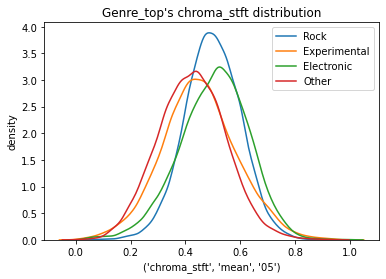

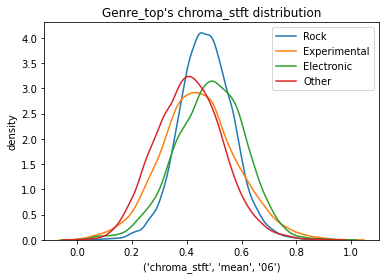

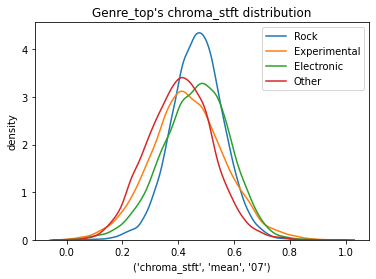

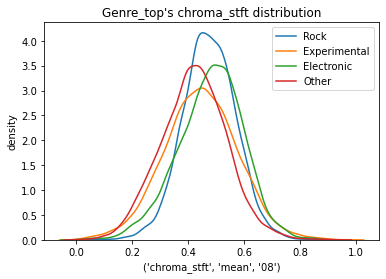

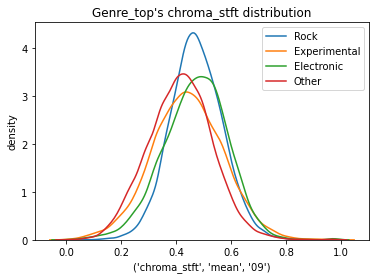

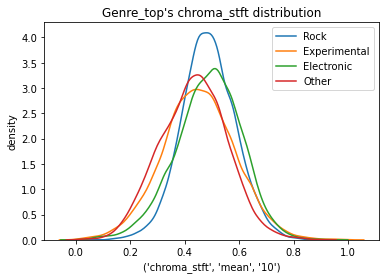

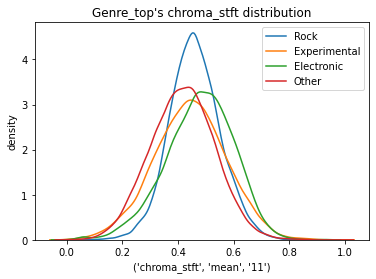

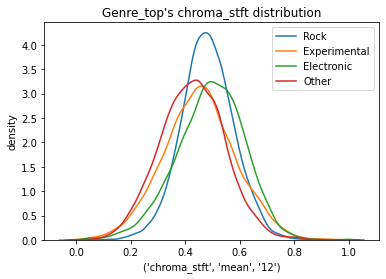

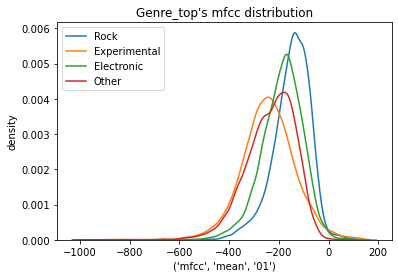

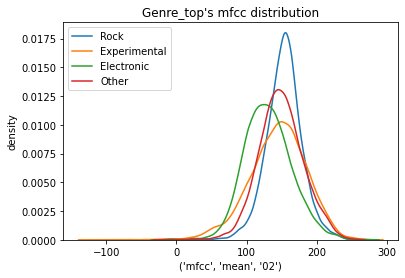

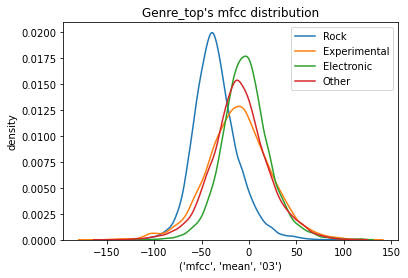

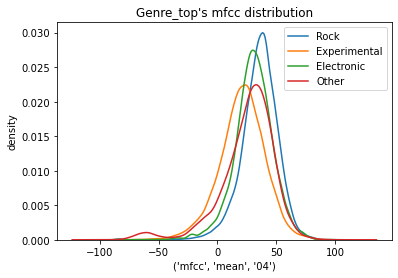

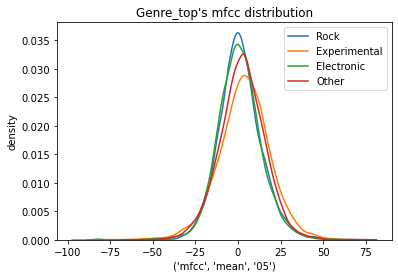

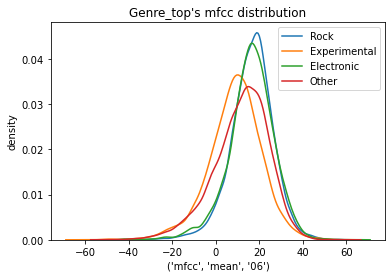

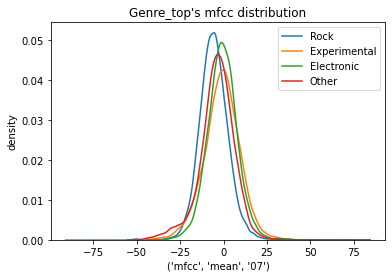

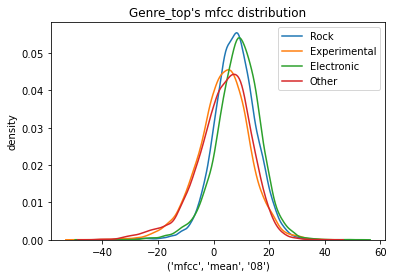

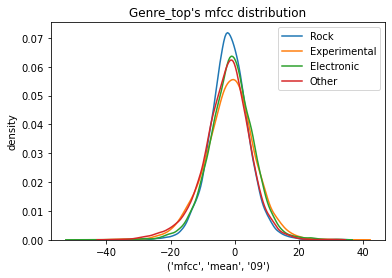

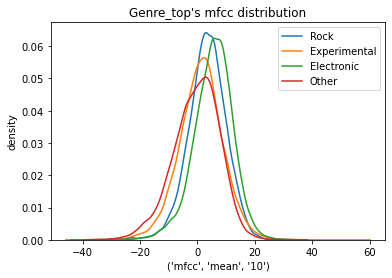

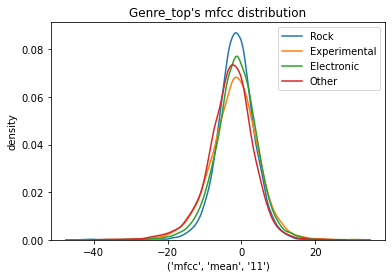

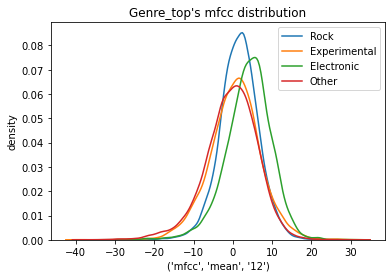

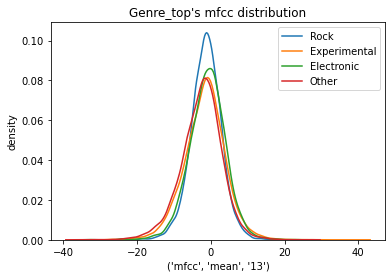

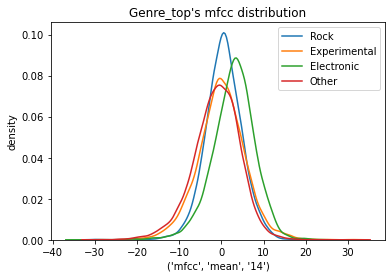

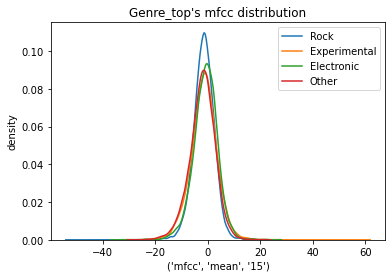

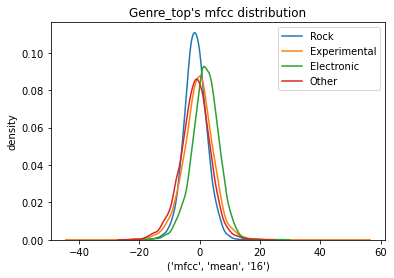

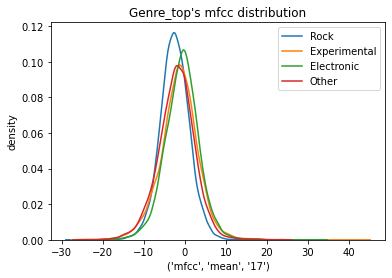

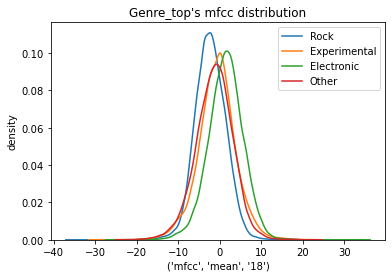

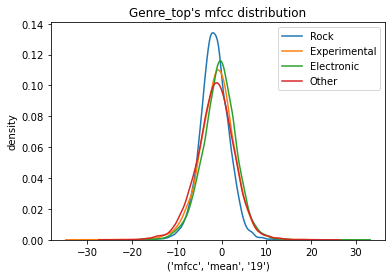

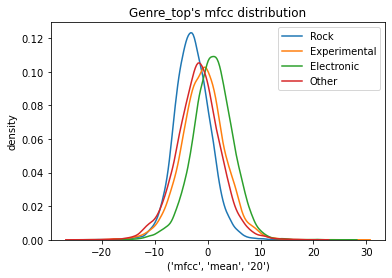

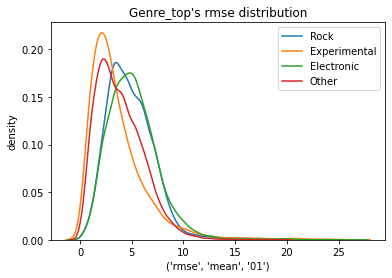

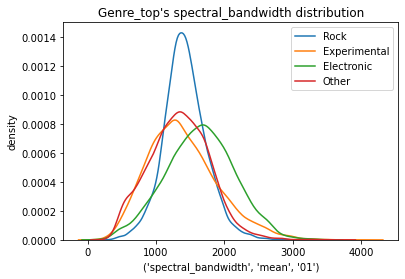

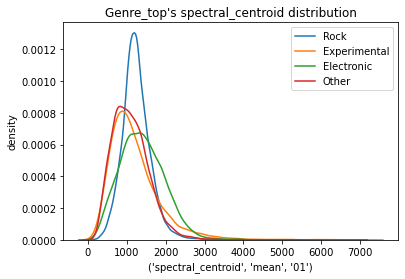

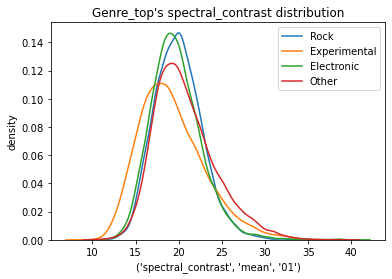

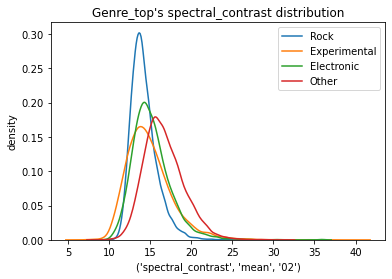

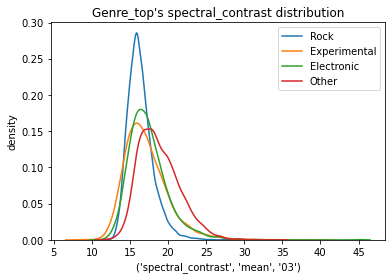

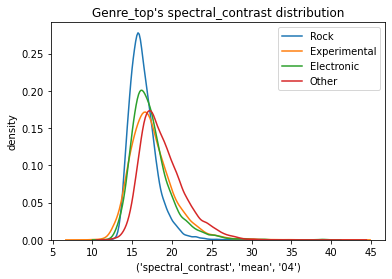

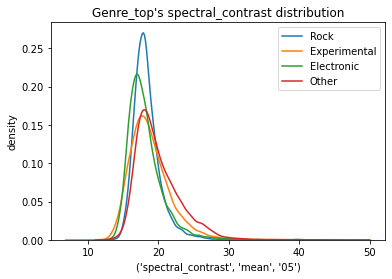

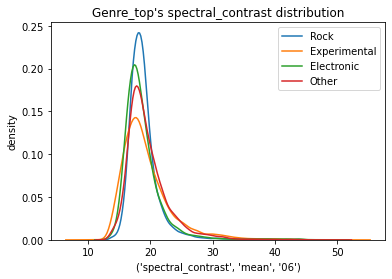

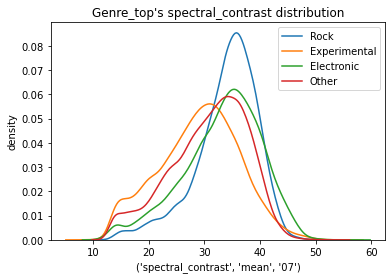

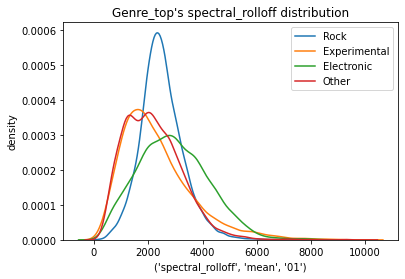

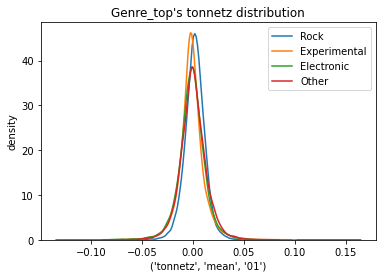

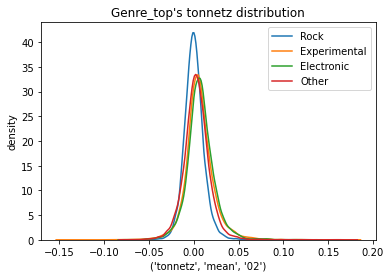

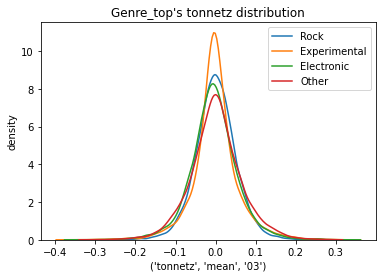

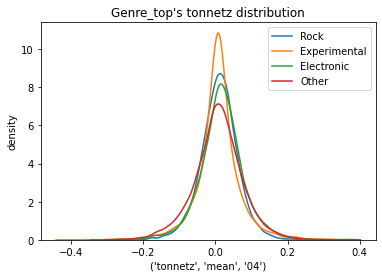

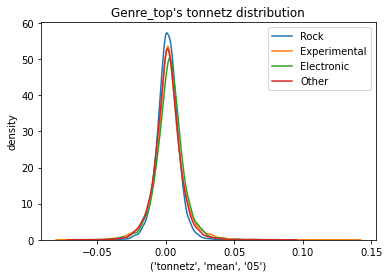

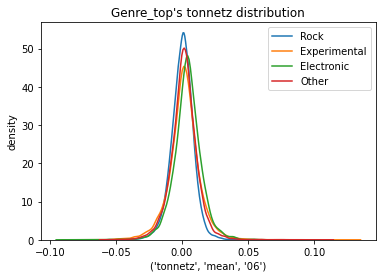

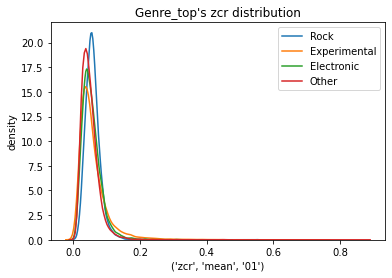

In [54]:
plt.rcParams["patch.force_edgecolor"] = True
top_genres = ["Rock", "Experimental", "Electronic", "Other"]
for var in librosaSetB.columns:
    if var[1] != "mean":
        continue
    for genre_top in top_genres:
        sns.kdeplot(librosaSetB[librosaSetB[('track', 'genre_top')] == genre_top][var], label=genre_top)
    plt.ylabel("density")
    plt.legend()
    plt.title("Genre_top's " + var[0] + " distribution")
    plt.show()

TODO From the above plots we can observe that:

<h2> Classification of genres based on few librosa features </h2>

In [222]:
main_librosa_columns = []
main_librosa_columns_names = []
for var in librosaFeatures.columns:
    if var[1] == "mean":
        main_librosa_columns.append(librosaFeatures[str(var[0])][str(var[1])][str(var[2])])
        main_librosa_columns_names.append(str(var[0]) + "_" + str(var[2]))

librosaMainFeatures=pd.concat(main_librosa_columns, axis=1)
librosaMainFeatures.columns = main_librosa_columns_names  # rename DataFrame names
librosaMainFeatures.shape

(106574, 74)

In [223]:
# merge librosa DataFrame with additional tracks info
# TODO
librosaMainFeatures = pd.concat([librosaMainFeatures, tracks[[('track', 'genre_top')]]], axis=1)
librosaMainFeatures.shape

(106574, 75)

In [224]:
# TODO: remove this 'NaN' imputation
"""cleanup_nums = {('track', 'genre_top'): {"Rock": "Rock",  "Experimental": "Experimental",
                            "Electronic": "Electronic", "NaN": "NaN", "Hip-Hop": "Other", 
                            "Pop": "Other", "Folk": "Other", "Jazz": "Other", "Spoken": "Other", 
                            "International": "Other", "Soul-RnB": "Other", "Blues": "Other", 
                            "Country": "Other", "Classical": "Other", "Old-Time / Historic": "Other",
                            "Instrumental": "Other", "Easy Listening": "Other"}}"""


librosaMainFeatures = librosaMainFeatures.fillna("NaN") 
cleanup_nums = {('track', 'genre_top'): {"Rock": 1,  "Experimental": 2,
                            "Electronic": 3, "NaN": 4, "Hip-Hop": 4, 
                            "Pop": 4, "Folk": 4, "Jazz": 4, "Spoken": 4, 
                            "International": 4, "Soul-RnB": 4, "Blues": 4, 
                            "Country": 4, "Classical": 4, "Old-Time / Historic": 4,
                            "Instrumental": 4, "Easy Listening": 4}}
librosaMainFeatures = librosaMainFeatures.replace(cleanup_nums)

In [225]:
librosaMainFeatures[('track', 'genre_top')].unique()

array([4, 1, 2, 3])

In [226]:
x = librosaMainFeatures.drop([('track', 'genre_top')], axis=1)
y = librosaMainFeatures[('track', 'genre_top')]

In [227]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [228]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [229]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

from sklearn.metrics import f1_score
print('F1Score of Logistic Regression: ', f1_score(y_test, y_pred, average="macro"))

Accuracy of logistic regression classifier on test set: 0.70
F1Score of Logistic Regression:  0.3731230043913106


/home/alexandra/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [230]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=300, bootstrap = True, max_features = 'sqrt')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('Accuracy of Random Forest on test set: {:.2f}'.format(model.score(x_test, y_test)))
print('F1Score of Random Forest classifier ',f1_score(y_test, y_pred, average="macro"))

Accuracy of Random Forest on test set: 0.72
F1Score of Random Forest classifier  0.3883067472508491


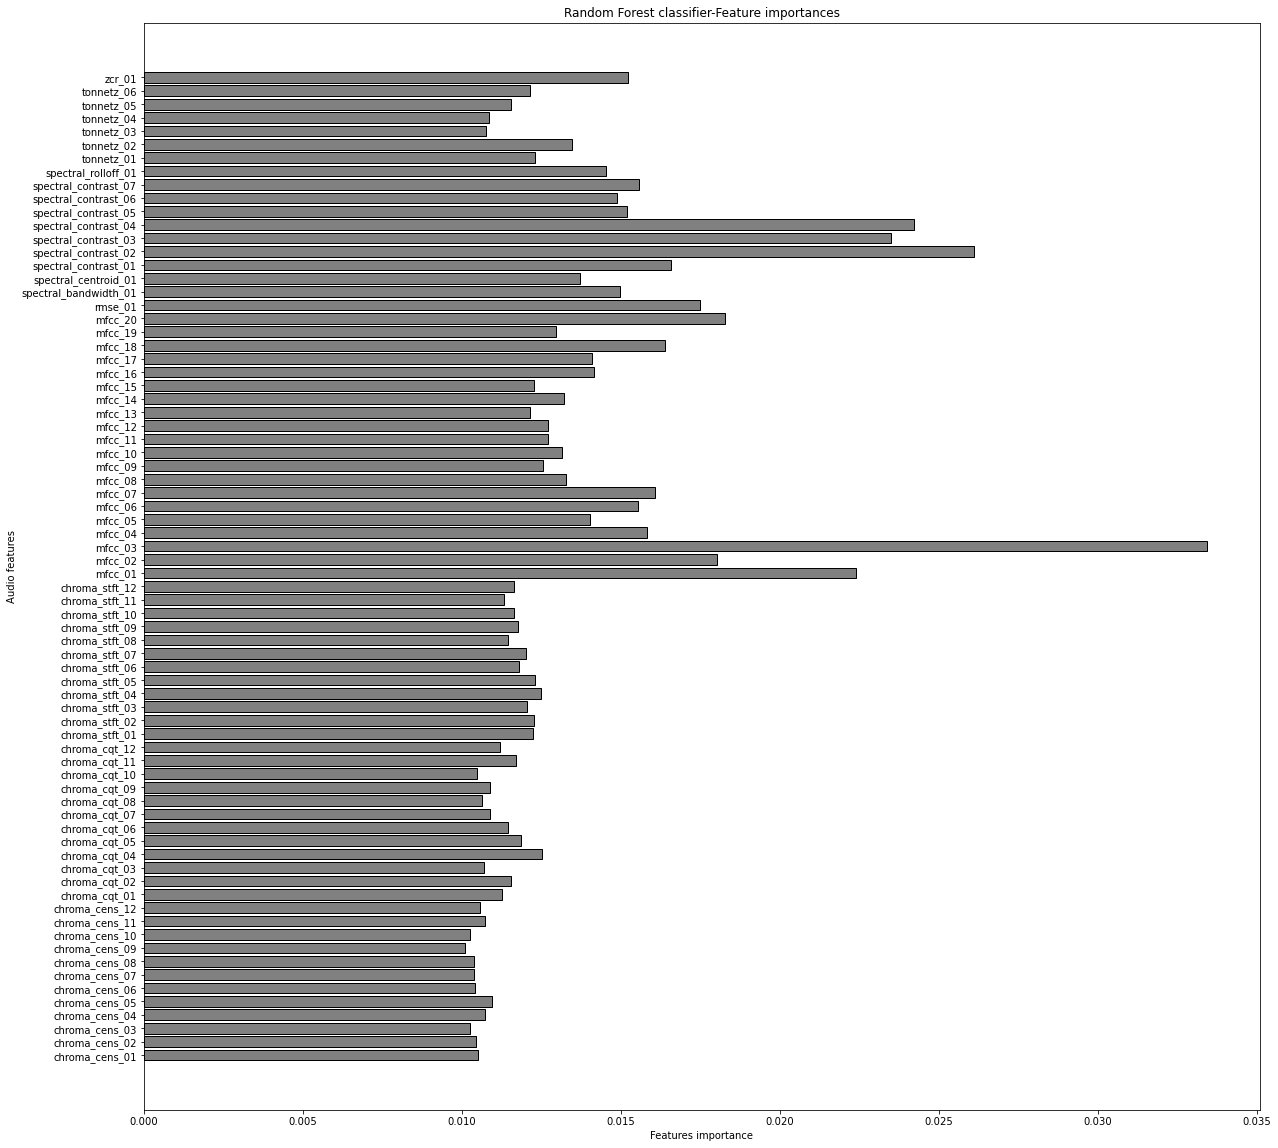

In [231]:
importance=list(model.feature_importances_)
allfeatures=librosaMainFeatures.drop(('track', 'genre_top'),axis=1)
features=list(allfeatures.columns)
fig = plt.figure(figsize = (20, 20)) 
plt.barh(features, importance, color ='grey') 
plt.title('Random Forest classifier-Feature importances')
plt.xlabel("Features importance") 
plt.ylabel("Audio features") 
plt.show() 

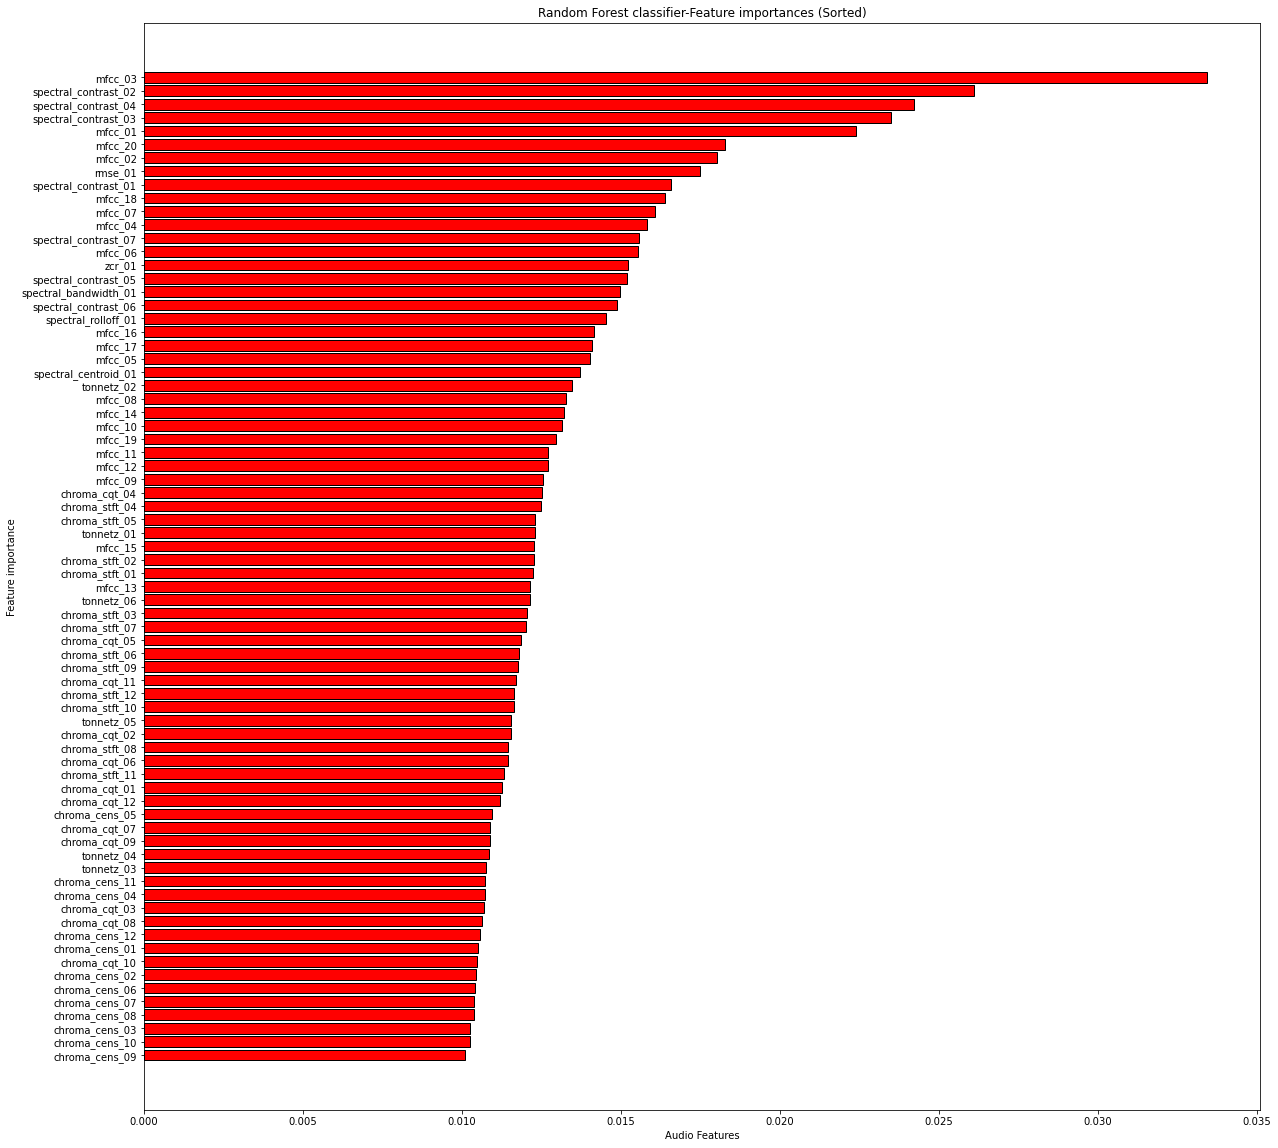

In [232]:
zipped_lists=zip(importance,features)
zipped_lists=list(sorted(zipped_lists))
importanceSorted,featuresSorted = zip(*zipped_lists)
fig = plt.figure(figsize = (20, 20)) 
plt.barh(list(featuresSorted), list(importanceSorted), color ='red') 
plt.title('Random Forest classifier-Feature importances (Sorted)')
plt.ylabel("Feature importance") 
plt.xlabel("Audio Features") 
plt.show()

<h6>Keeping only feature's mean 01 values (= 01 stands for song's beginning???) </h6> 

In [208]:
librosaMainFeatures=pd.concat([librosaFeatures['chroma_cens']['mean']['01'],\
                               librosaFeatures['chroma_cqt']['mean']['01'],\
                               librosaFeatures['chroma_stft']['mean']['01'],\
                               librosaFeatures['mfcc']['mean']['01'], \
                               librosaFeatures['rmse']['mean']['01'], \
                               librosaFeatures['spectral_bandwidth']['mean']['01'],\
                               librosaFeatures['spectral_centroid']['mean']['01'], \
                               librosaFeatures['spectral_contrast']['mean']['01'],\
                               librosaFeatures['spectral_rolloff']['mean']['01'],\
                               librosaFeatures['tonnetz']['mean']['01'], \
                               librosaFeatures['zcr']['mean']['01']], axis=1,)
librosaMainFeatures.shape

(106574, 11)

In [209]:
librosaMainFeatures.columns = list(librosa_columns.keys())

In [210]:
librosaMainFeatures.head().T

track_id                     2            3            5            10  \
chroma_cens            0.474300     0.232784     0.258420     0.229882   
chroma_cqt             0.883210     0.525373     0.535632     0.519918   
chroma_stft            0.696063     0.449602     0.481160     0.388109   
mfcc                -163.772964  -159.004166  -205.440491  -135.864822   
rmse                   3.188761     3.607359     3.251386     3.893810   
spectral_bandwidth  1607.474365  1736.961426  1512.917358  1420.259644   
spectral_centroid   1639.583252  1763.012451  1292.958130  1360.028687   
spectral_contrast     18.005175    15.732023    17.097452    19.177481   
spectral_rolloff    3267.804688  3514.619629  2773.931885  2603.491943   
tonnetz               -0.002570     0.000183    -0.007501    -0.021650   
zcr                    0.085629     0.084578     0.053114     0.077515   

track_id                     20  
chroma_cens            0.202806  
chroma_cqt             0.443509  
chroma_stft            0.346976  
mfcc                -135.135895  
rmse                   4.600440  
spectral_bandwidth  2489.015625  
spectral_centroid   1732.971802  
spectral_contrast     16.042891  
spectral_rolloff    4201.346191  
tonnetz                0.012362  
zcr                    0.047225

In [211]:
# merge librosa DataFrame with additional tracks info
# TODO
librosaMainFeatures = pd.concat([librosaMainFeatures, tracks[[('track', 'genre_top')]]], axis=1)
librosaMainFeatures.shape

(106574, 12)

In [212]:
# TODO: remove this 'NaN' imputation
"""cleanup_nums = {('track', 'genre_top'): {"Rock": "Rock",  "Experimental": "Experimental",
                            "Electronic": "Electronic", "NaN": "NaN", "Hip-Hop": "Other", 
                            "Pop": "Other", "Folk": "Other", "Jazz": "Other", "Spoken": "Other", 
                            "International": "Other", "Soul-RnB": "Other", "Blues": "Other", 
                            "Country": "Other", "Classical": "Other", "Old-Time / Historic": "Other",
                            "Instrumental": "Other", "Easy Listening": "Other"}}"""


librosaMainFeatures = librosaMainFeatures.fillna("NaN") 
cleanup_nums = {('track', 'genre_top'): {"Rock": 1,  "Experimental": 2,
                            "Electronic": 3, "NaN": 4, "Hip-Hop": 4, 
                            "Pop": 4, "Folk": 4, "Jazz": 4, "Spoken": 4, 
                            "International": 4, "Soul-RnB": 4, "Blues": 4, 
                            "Country": 4, "Classical": 4, "Old-Time / Historic": 4,
                            "Instrumental": 4, "Easy Listening": 4}}
librosaMainFeatures = librosaMainFeatures.replace(cleanup_nums)

In [213]:
librosaMainFeatures[('track', 'genre_top')].unique()

array([4, 1, 2, 3])

In [214]:
x = librosaMainFeatures.drop([('track', 'genre_top')], axis=1)
y = librosaMainFeatures[('track', 'genre_top')]

In [215]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [216]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [217]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

from sklearn.metrics import f1_score
print('F1Score of Logistic Regression: ', f1_score(y_test, y_pred, average="macro"))

Accuracy of logistic regression classifier on test set: 0.69
F1Score of Logistic Regression:  0.30184505932270395


In [218]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=300, bootstrap = True, max_features = 'sqrt')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('Accuracy of Random Forest on test set: {:.2f}'.format(model.score(x_test, y_test)))
print('F1Score of Random Forest classifier ',f1_score(y_test, y_pred, average="macro"))

Accuracy of Random Forest on test set: 0.70
F1Score of Random Forest classifier  0.37835313523994674


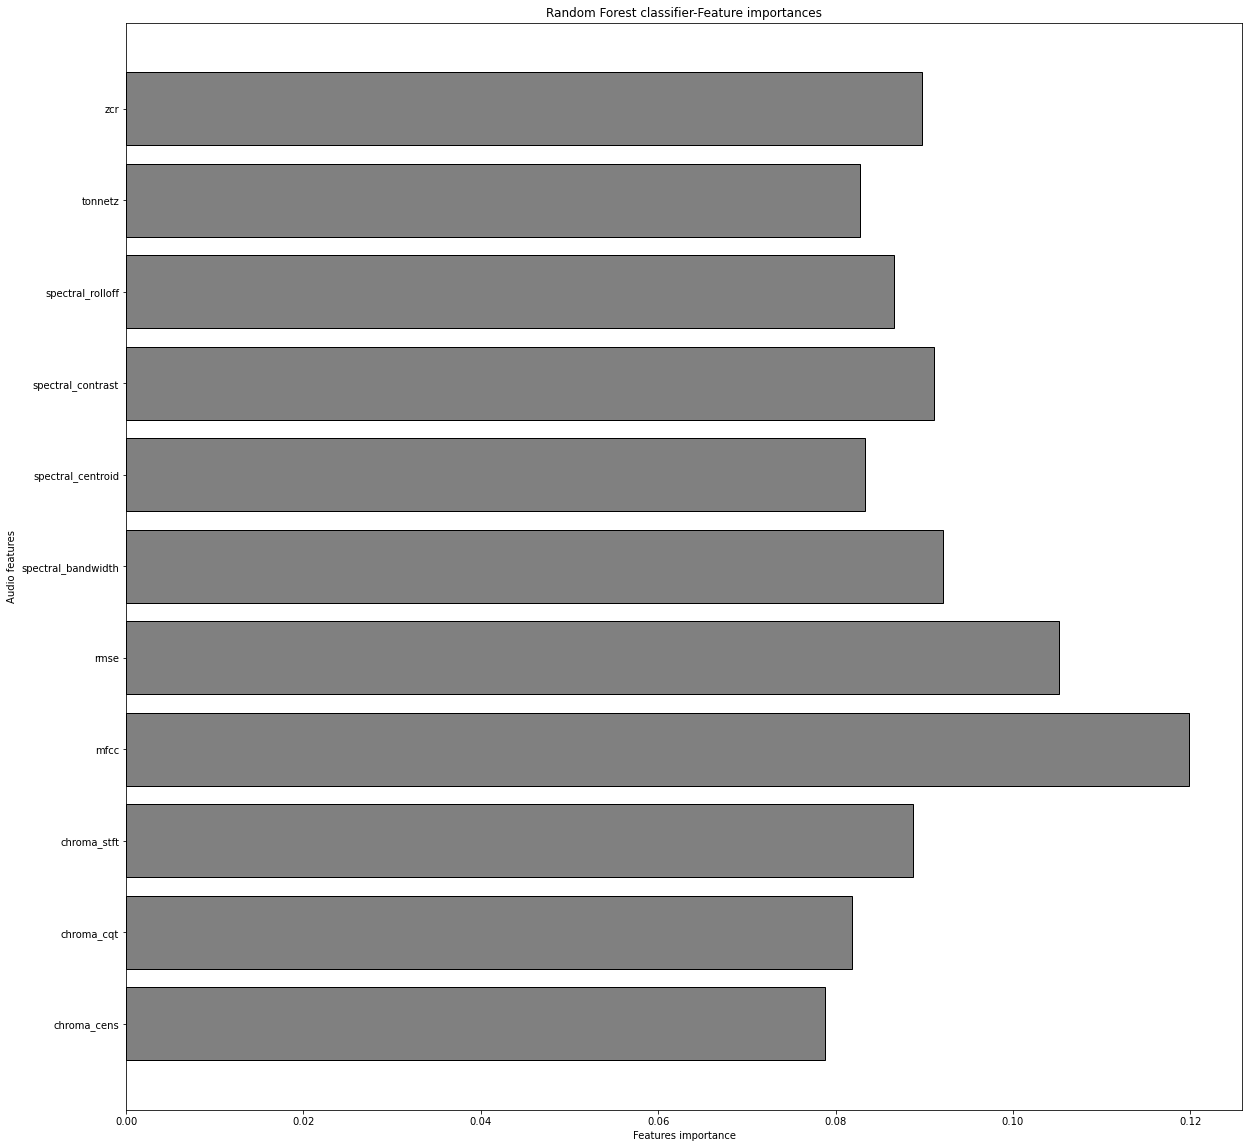

In [219]:
importance=list(model.feature_importances_)
allfeatures=librosaMainFeatures.drop(('track', 'genre_top'),axis=1)
features=list(allfeatures.columns)
fig = plt.figure(figsize = (20, 20)) 
plt.barh(features, importance, color ='grey') 
plt.title('Random Forest classifier-Feature importances')
plt.xlabel("Features importance") 
plt.ylabel("Audio features") 
plt.show() 

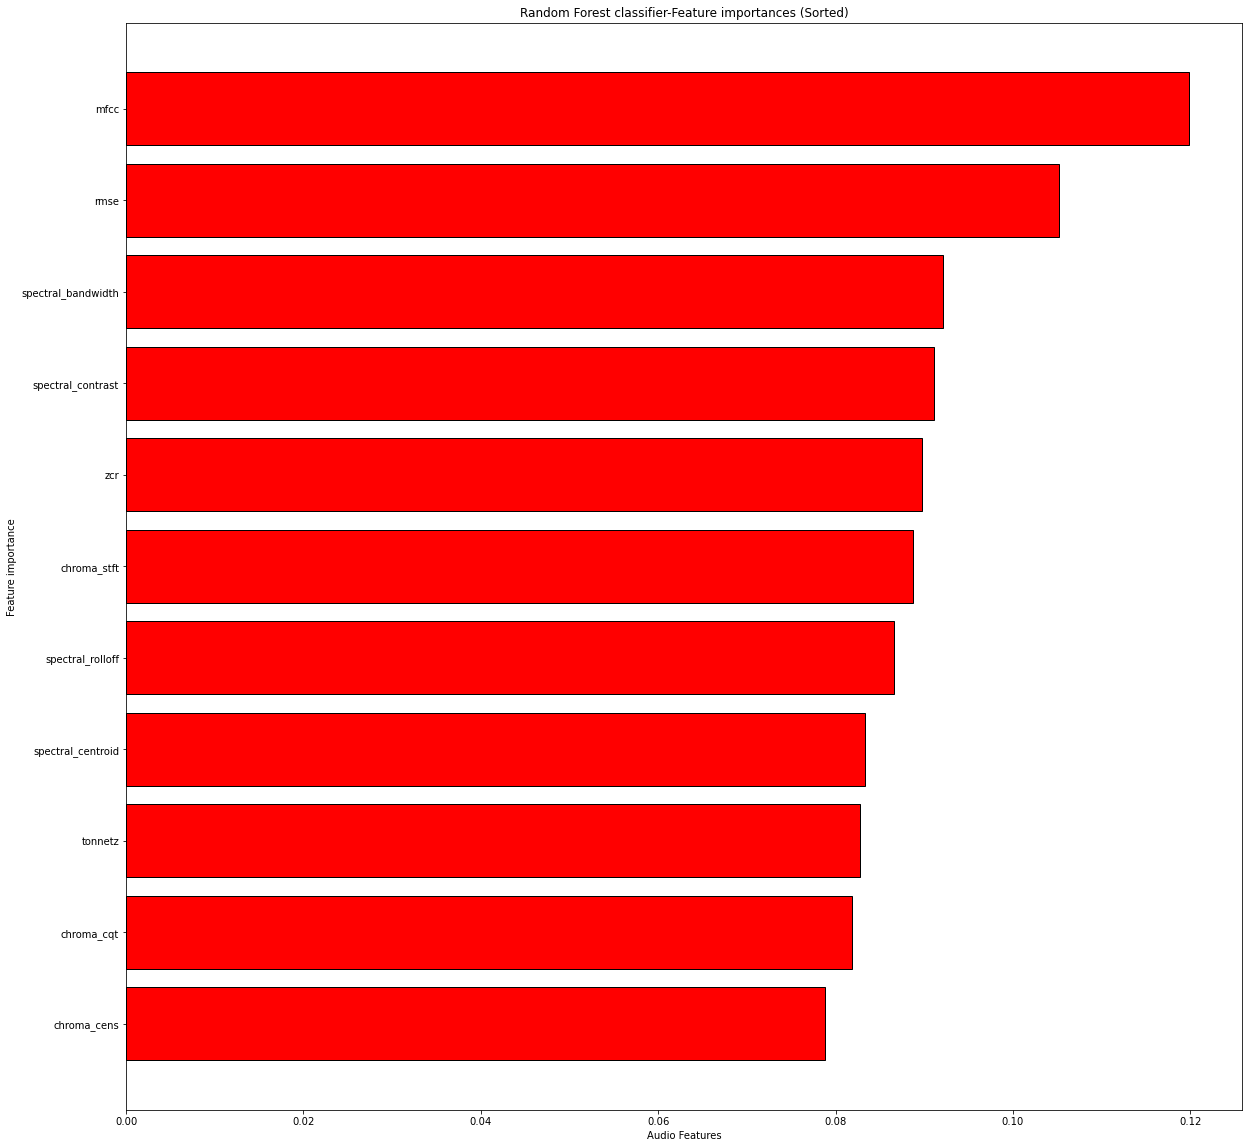

In [220]:
zipped_lists=zip(importance,features)
zipped_lists=list(sorted(zipped_lists))
importanceSorted,featuresSorted = zip(*zipped_lists)
fig = plt.figure(figsize = (20, 20)) 
plt.barh(list(featuresSorted), list(importanceSorted), color ='red') 
plt.title('Random Forest classifier-Feature importances (Sorted)')
plt.ylabel("Feature importance") 
plt.xlabel("Audio Features") 
plt.show()